# ML Final Project: Brain Stroke Prediction

This is the complete code for our final project for the Intro to ML class. Our project aims to develop a model for brain stroke prediction. We used the brain stroke dataset which can be found here: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

For this project, we trained the data on three different models: Logistic Regression, SVMs, and Neural Networks. We tried changing the parameteres, adding regularization as well as cross validation to get optimal resulst.

## Dataset Overview:

Fetaures:

1) gender: "Male", "Female"

2) age: age of the patient (continious variable)

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"

6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"

7) Residencetype: "Rural" or "Urban"

8) avg glucose level: average glucose level in blood

9) BMI: body mass index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


Target variable:

stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
!python3 -m pip install scikit-learn


In [ ]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module

# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Scaling is suggested when running a gradient descent algorithm
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

## Preparing the data

In [ ]:
# loading the data into a dataframe
df = pd.read_csv('brain_stroke.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.shape

(4981, 11)

In [ ]:
df.isnull().sum() #checking for total null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Figure 1: Age Distribution')

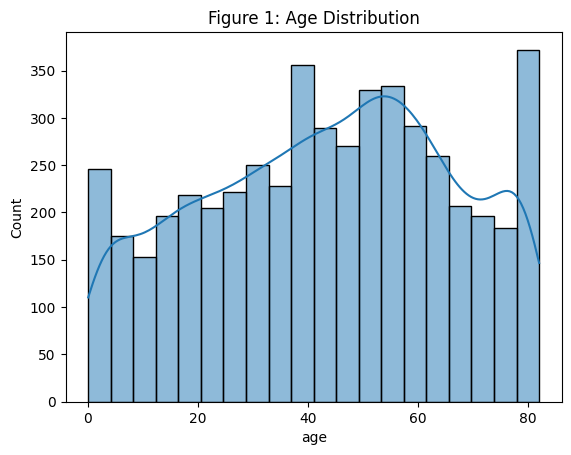

In [ ]:
fig = 1
sns.histplot(df['age'], kde=True).set_title(f'Figure {fig}: Age Distribution')

Text(0.5, 1.0, 'Figure 2: Age Distribution by Stroke')

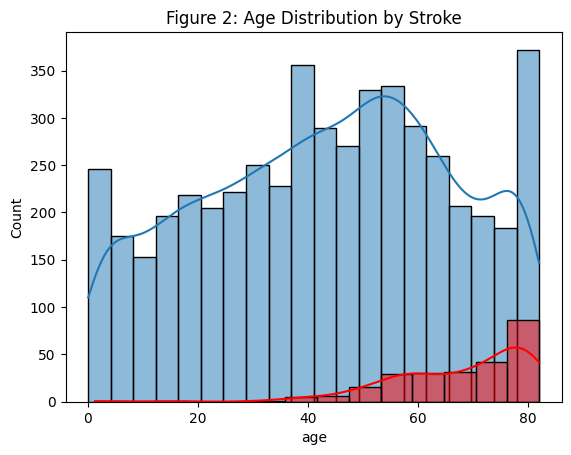

In [ ]:
fig+=1
sns.histplot(df['age'], kde=True)
sns.histplot(df[df['stroke'] == 1]['age'], kde=True, color='red').set_title(f'Figure {fig}: Age Distribution by Stroke')

Text(0.5, 1.0, 'Figure 3: Hypertension Distribution')

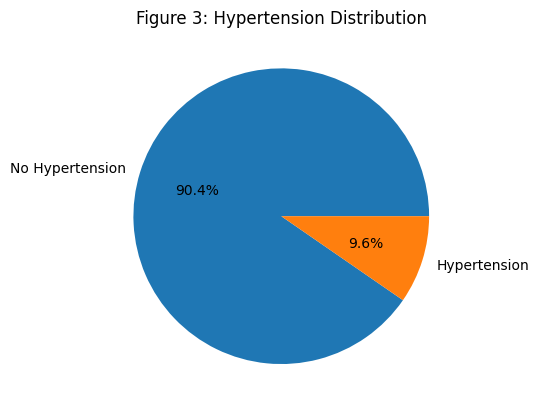

In [ ]:
fig+=1
plt.pie(df['hypertension'].value_counts(), labels=['No Hypertension', 'Hypertension'], autopct='%1.1f%%')
plt.title(f'Figure {fig}: Hypertension Distribution')

Text(0.5, 1.0, 'Figure 4: Hypertension Distribution by Stroke')

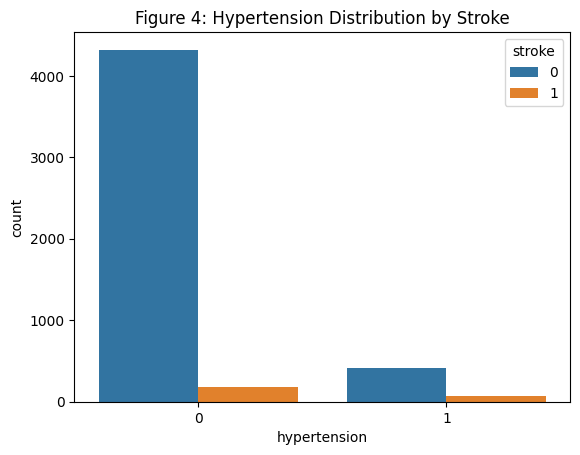

In [ ]:
fig+=1
sns.countplot(df, x='hypertension', hue='stroke').set_title(f'Figure {fig}: Hypertension Distribution by Stroke')

Text(0.5, 1.0, 'Figure 5: Heart Disease Distribution')

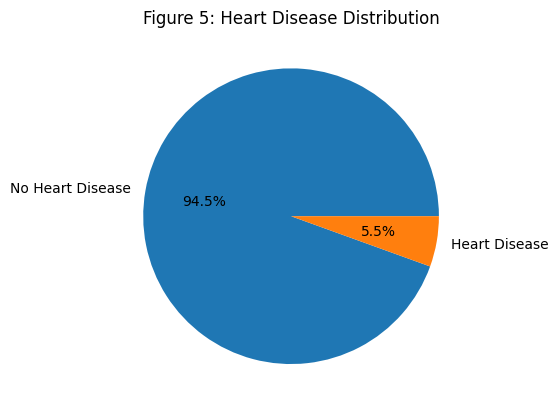

In [ ]:
fig+=1
plt.pie(df['heart_disease'].value_counts(), labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%')
plt.title(f'Figure {fig}: Heart Disease Distribution')

Text(0.5, 1.0, 'Figure 6: Heart Disease Distribution by Stroke')

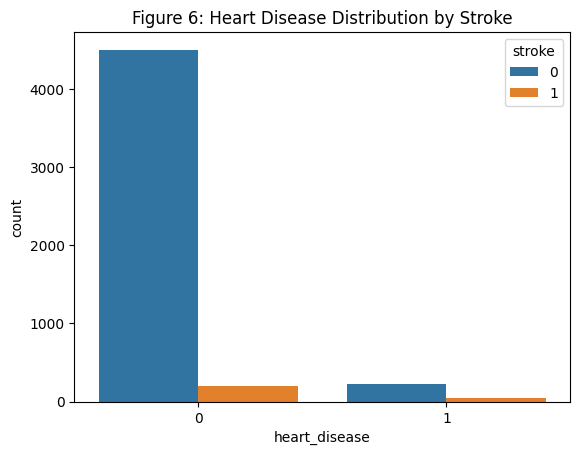

In [ ]:
fig+=1
sns.countplot(df, x='heart_disease', hue='stroke').set_title(f'Figure {fig}: Heart Disease Distribution by Stroke')

Text(0.5, 1.0, 'Figure 7: Average Glucose Level Distribution')

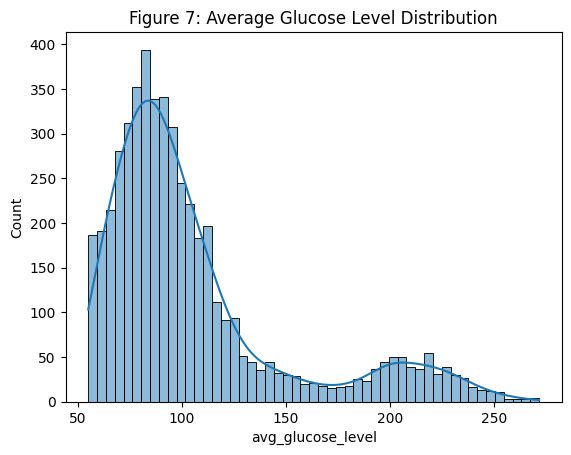

In [ ]:
fig+=1
sns.histplot(df['avg_glucose_level'], kde=True).set_title(f'Figure {fig}: Average Glucose Level Distribution')

Text(0.5, 1.0, 'Figure 8: Average Glucose Level Distribution by Stroke')

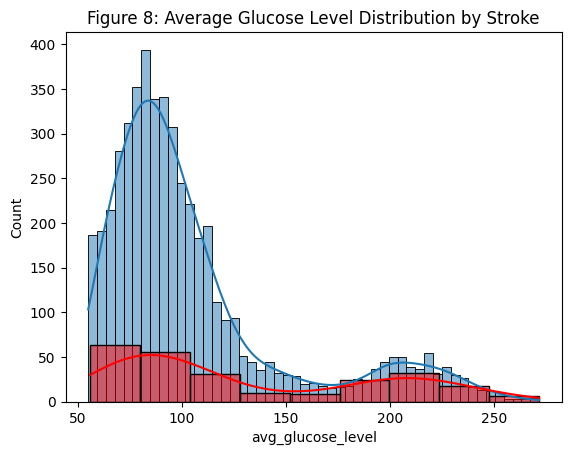

In [ ]:
fig+=1
sns.histplot(df['avg_glucose_level'], kde=True)
sns.histplot(df[df['stroke'] == 1]['avg_glucose_level'], kde=True, color='red').set_title(f'Figure {fig}: Average Glucose Level Distribution by Stroke')

Text(0.5, 1.0, 'Figure 9: Gender Distribution')

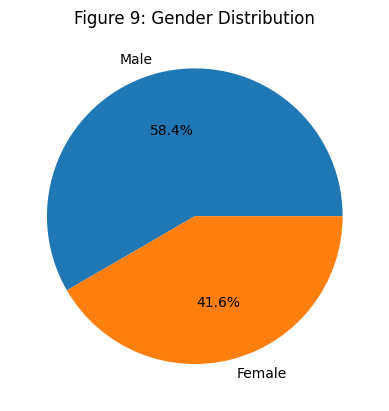

In [ ]:
fig+=1
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title(f'Figure {fig}: Gender Distribution')

Text(0.5, 1.0, 'Figure 10: Gender Distribution by Stroke')

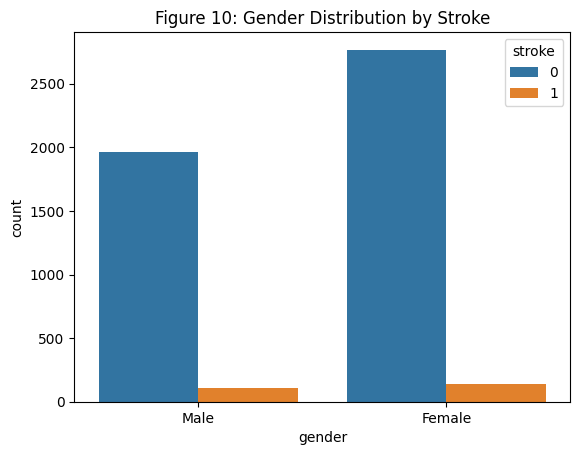

In [ ]:
fig+=1
sns.countplot(df, x='gender', hue='stroke').set_title(f'Figure {fig}: Gender Distribution by Stroke')


Text(0.5, 1.0, 'Figure 11: Ever Married Distribution')

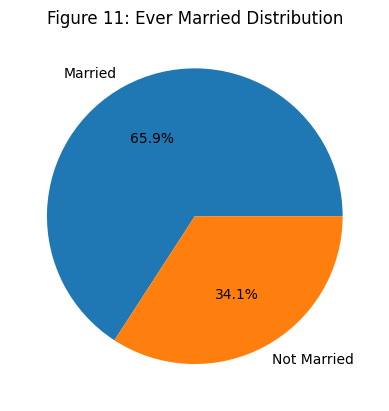

In [ ]:
fig+=1
plt.pie(df['ever_married'].value_counts(), labels=['Married', 'Not Married'], autopct='%1.1f%%')
plt.title(f'Figure {fig}: Ever Married Distribution')

Text(0.5, 1.0, 'Figure 12: Ever Married Distribution by Stroke')

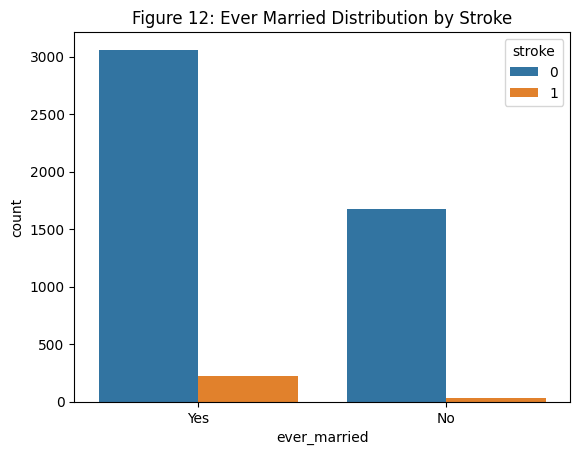

In [ ]:
fig+=1
sns.countplot(df, x='ever_married', hue='stroke').set_title(f'Figure {fig}: Ever Married Distribution by Stroke')

Text(0.5, 1.0, 'Figure 13: Work Type Distribution')

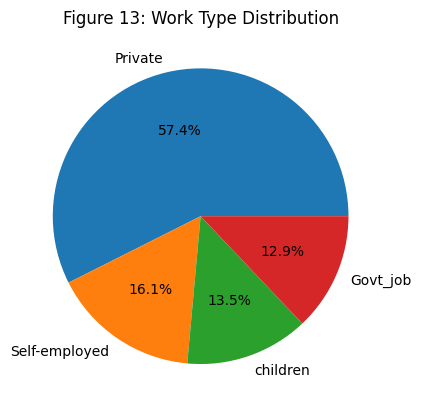

In [ ]:
fig+=1
plt.pie(df['work_type'].value_counts(), labels=df['work_type'].value_counts().index, autopct='%1.1f%%')
plt.title(f'Figure {fig}: Work Type Distribution')

Text(0.5, 1.0, 'Figure 14: Work Type Distribution by Stroke')

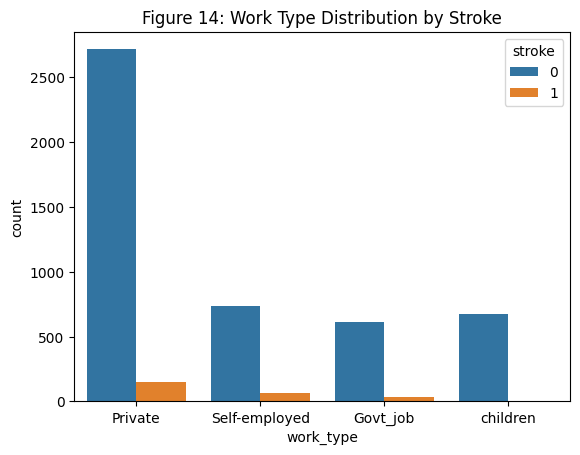

In [ ]:
fig+=1
sns.countplot(df, x='work_type', hue='stroke').set_title(f'Figure {fig}: Work Type Distribution by Stroke')

Text(0.5, 1.0, 'Figure 15: Residence Type distribution')

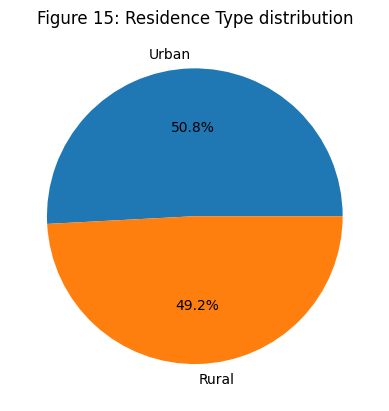

In [ ]:
fig+=1
plt.pie(df['Residence_type'].value_counts(), labels=['Urban', 'Rural'], autopct='%1.1f%%')
plt.title(f'Figure {fig}: Residence Type distribution')

Text(0.5, 1.0, 'Figure 16: Residence Type Distribution by Stroke')

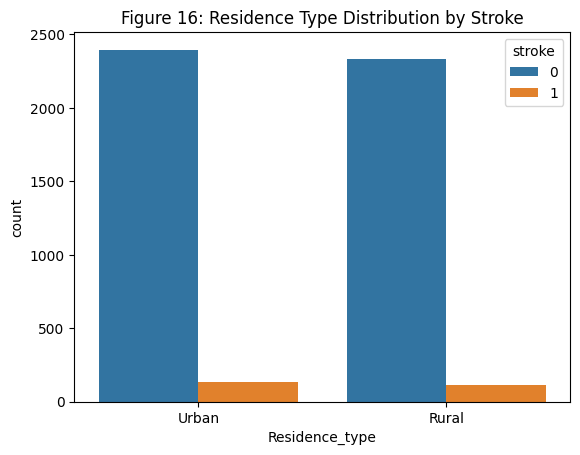

In [ ]:
fig+=1
sns.countplot(df, x='Residence_type', hue='stroke').set_title(f'Figure {fig}: Residence Type Distribution by Stroke')

Text(0.5, 1.0, 'Figure 17: BMI Distribution')

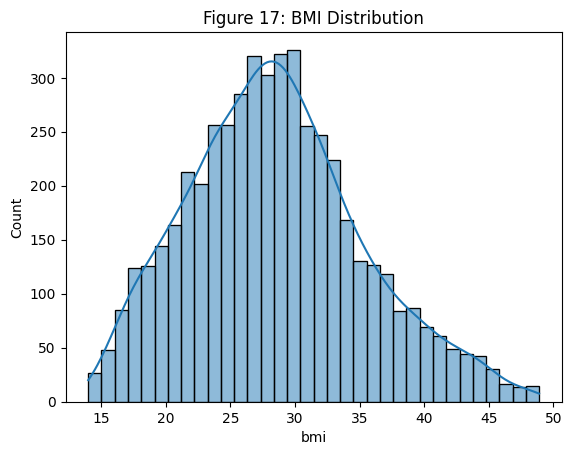

In [ ]:
fig+=1
sns.histplot(df['bmi'], kde=True).set_title(f'Figure {fig}: BMI Distribution')

Text(0.5, 1.0, 'Figure 18: BMI Distribution by Stroke')

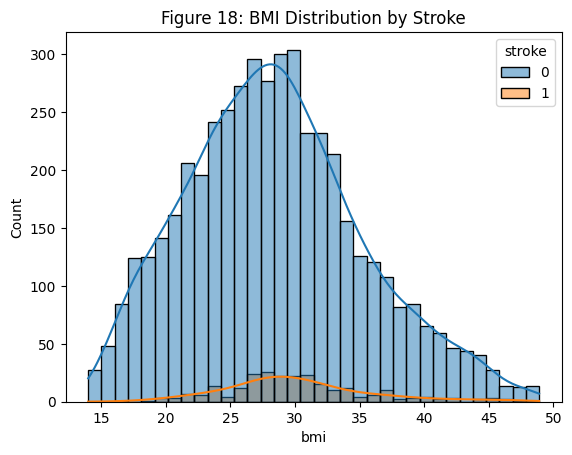

In [ ]:
fig+=1
sns.histplot(df, x='bmi', hue='stroke', kde=True).set_title(f'Figure {fig}: BMI Distribution by Stroke')

Text(0.5, 1.0, 'Figure 19: Smoking Status Distribution')

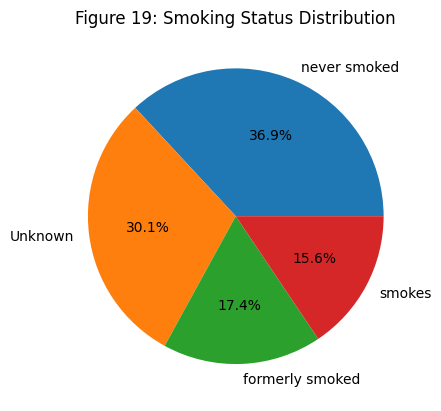

In [ ]:
fig+=1
plt.pie(df['smoking_status'].value_counts(), labels=df['smoking_status'].value_counts().index, autopct='%1.1f%%')
plt.title(f'Figure {fig}: Smoking Status Distribution')

Text(0.5, 1.0, 'Figure 20: Smoking Status Distribution by Stroke')

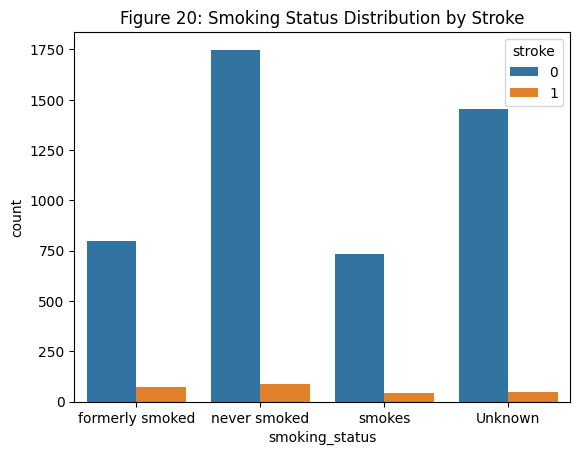

In [ ]:
fig+=1
sns.countplot(df, x='smoking_status', hue='stroke').set_title(f'Figure {fig}: Smoking Status Distribution by Stroke')

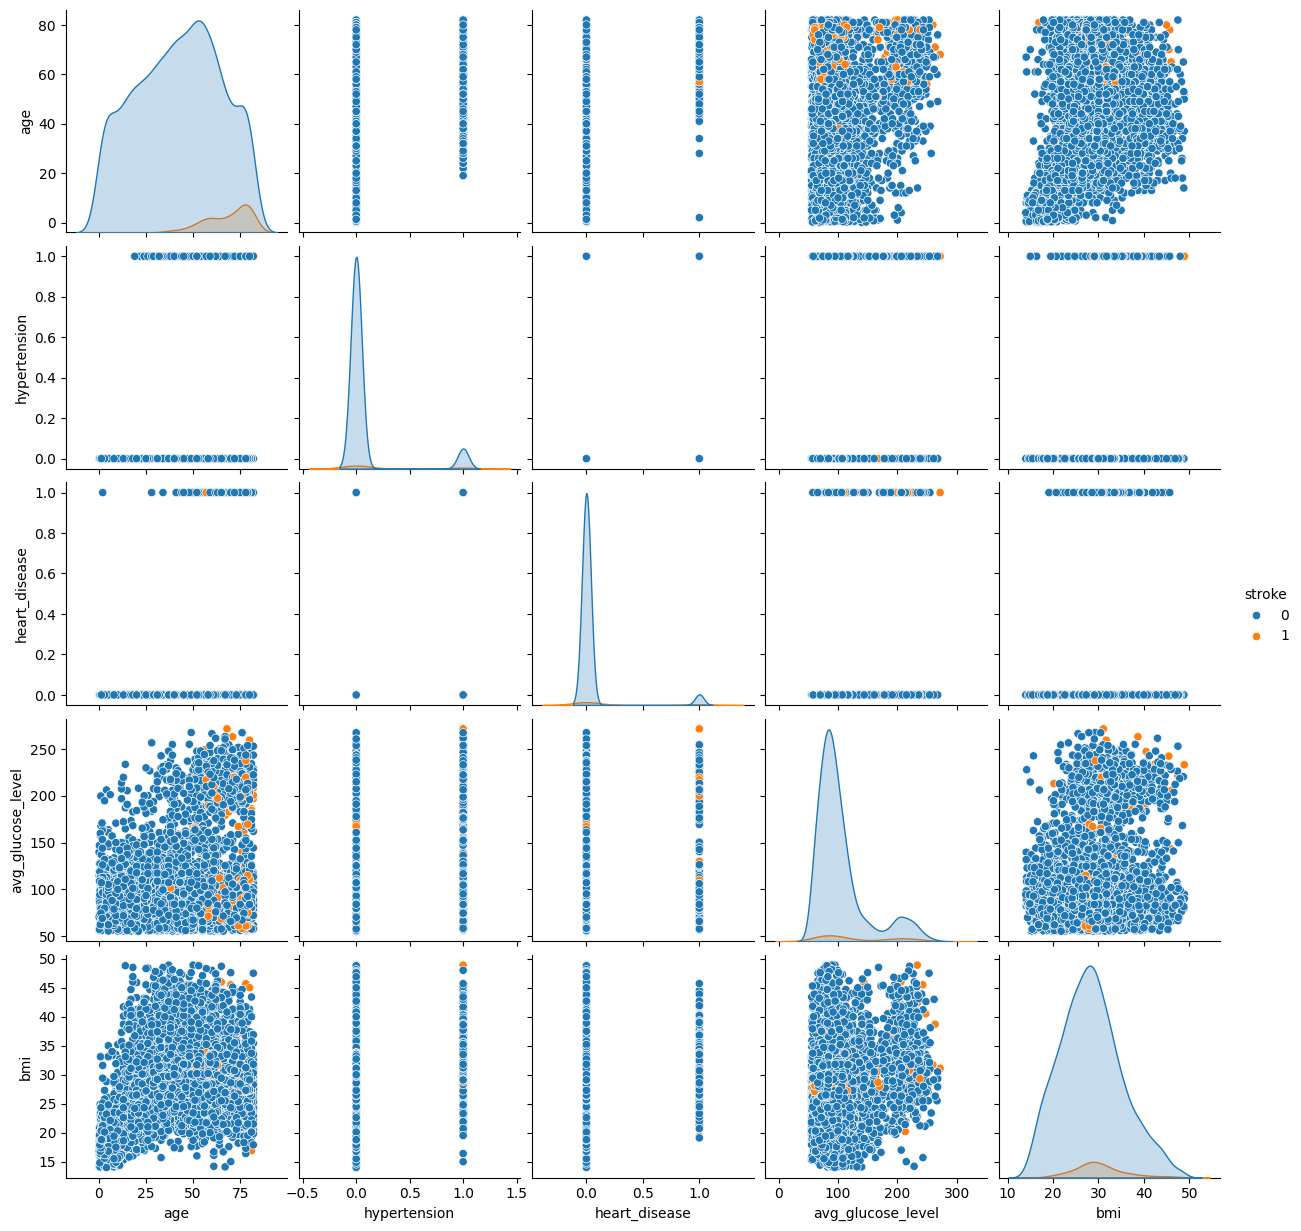

In [ ]:
sns.pairplot(df, hue='stroke')

## Encoding

When looking at the dataset, it seems like a lot of our columns have categorical data. Columns 'gender', 'ever_married', and 'Residence_type' contain binary values so we will manually encode them. For instance, 'gender' becomes one column called 'male' where values of 1 mean male and values of 0 mean that it's a female.

In [ ]:
# Dummy variable encoding for columns that contain 0 or 1 values
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df.rename(columns={'gender': 'male', 'Residence_type': 'Urban'})

,male,age,hypertension,heart_disease,ever_married,work_type,Urban,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,Private,0,70.15,29.8,formerly smoked,0
4977,1,40.0,0,0,1,Private,1,191.15,31.1,smokes,0
4978,0,45.0,1,0,1,Govt_job,0,95.02,31.8,smokes,0
4979,1,40.0,0,0,1,Private,0,83.94,30.0,smokes,0


Columns 'work_type' and 'smoking_status' contain data with different categories. We will use hot-one encoding for them!



In [ ]:
# One-hot encoding for columns that contain 0 or 1 values
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])
X = df.drop(columns=['stroke'])
y = df['stroke']

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,False,True,False,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,False,True,False,False,False,False,True,False
2,0,49.0,0,0,1,1,171.23,34.4,False,True,False,False,False,False,False,True
3,0,79.0,1,0,1,0,174.12,24.0,False,False,True,False,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,False,True,False,False,False,True,False,False


## Splitting the dataset


We have a moderate amount of data, so we chose to plit it into two datasets for training and testing. We are using our test test as a validation set to get an optimistic prediction of the perfromance of our model. We will later use cross-validation to get an estimate of the average performance of the data.

In this project, we decide to use an 70/30 split where 70% of the data was used for training the model and 30% was used for testing. The decision to use this specific split was to allow us to have enough data to train the model effectively, while also having anough data to reliably evaluate the models' performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(3486, 16)

We will be scaling the training data only as it reduces data leakage and not scaling the test set gives a more accurate measure for the performance of our model. Additionally, because our data is a mix of numeric and encoded (0 or 1) data, we will not scale the whole training dataset. Instead, we will be scaling the numeric columns only of X_train aka 'age', 'avg_glucose_level', and 'bmi'. The other columns remain the same.

In [ ]:
# scaling the numeric columns only of the training data
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4260,0,0.546040,0,0,1,1,-0.174893,0.612140,False,False,True,False,False,True,False,False
1658,1,-0.371059,0,0,1,1,-0.514646,-0.685784,False,True,False,False,False,False,True,False
1151,1,-1.244485,0,0,0,0,-0.608172,-0.508795,False,True,False,False,True,False,False,False
3975,1,0.502368,0,0,1,0,-0.569166,0.022174,False,True,False,False,False,False,False,True
647,0,-1.331828,0,0,0,0,-0.947925,-1.334746,False,False,False,True,True,False,False,False


### Balance

We will investigate the balance of the dataset.

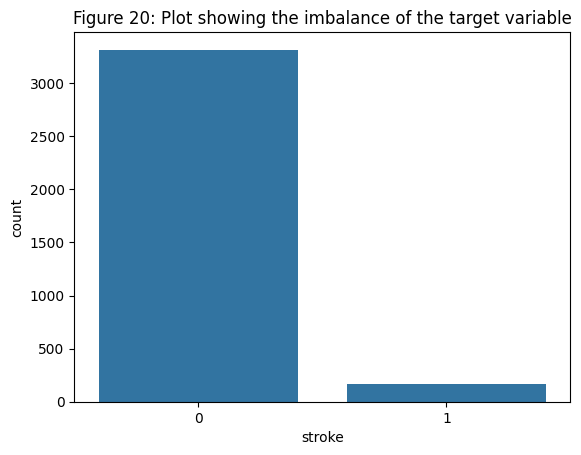

In [ ]:
# Plot showing the count of traget varible of class 0 and class 1.
sns.countplot(data=X_train, x=y_train)
plt.title(f'Figure {fig}: Plot showing the imbalance of the target variable')
plt.show()

In [ ]:
X_train.shape  # the original size is (3486, 16)

(3486, 16)

It looks like the data is clearly imbalanced. To solve the issue, we decide to do oversampling considering 1) Undersampling would reduce our number of training examples and 2) Oversampling generally performs better (Mohammed et al., 2020). We use SMOTE from the imblearn library.

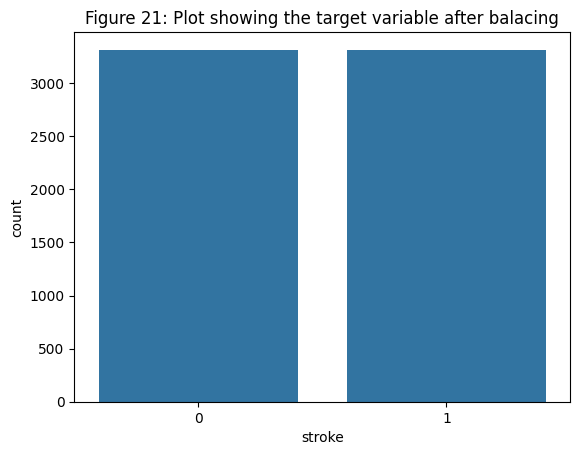

In [ ]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

fig+=1
sns.countplot(data=X_train, x=y_train)
plt.title(f'Figure {fig}: Plot showing the target variable after balacing')
plt.show()

In [ ]:
X_train.shape # The new size of X_train is now (6632, 16)

(6632, 16)

Note that we will not be augmenting the X matrix as the logistic regression function from sklearn does that by default.

# Training and Testing


## Logistic Regression


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train,y_train)
#Prediction
yhat=logistic.predict(X_test)

In [ ]:
score = logistic.score(X_train,y_train)*100
print(f'The accuracy score is: {score}%')

The accuracy score is: 82.35826296743063%


In [ ]:
score = logistic.score(X_test,y_test)*100
print(f'The accuracy score is: {score}%')

The accuracy score is: 81.67224080267559%


In [ ]:
y_probs = logistic.predict_proba(X_test)[:, 1]  # Probabilities of class 1
roc_auc = roc_auc_score(y_test, yhat)*100
print(roc_auc)

68.52505292872264


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1417
           1       0.15      0.54      0.23        78

    accuracy                           0.82      1495
   macro avg       0.56      0.69      0.57      1495
weighted avg       0.93      0.82      0.86      1495



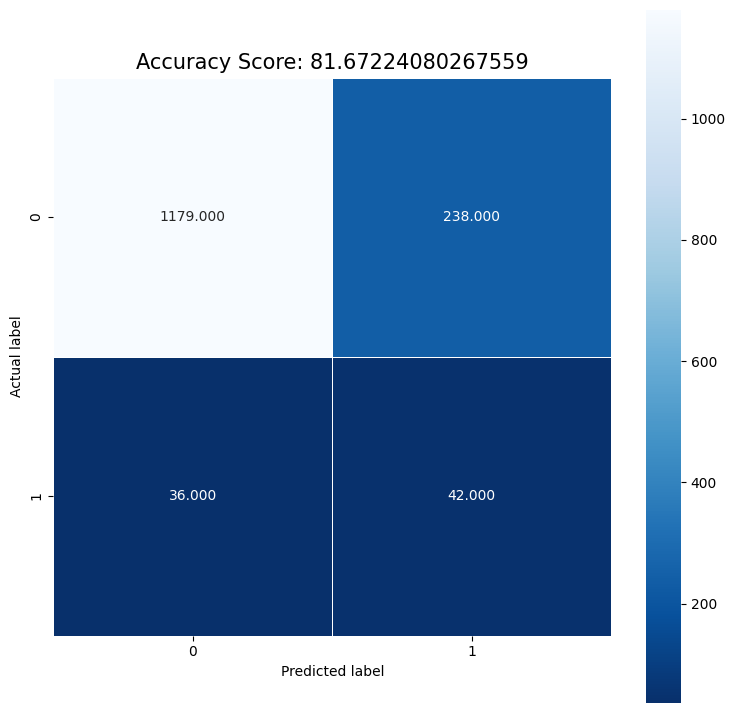

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, yhat)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

The logistic model without regularization or feature transformation has good accuracy but the auc score is low. It's predicting only 42 TPs and 238 FPs. It's an okay model but we can do better.

Next, we will be adding l1 and l2 regularization as well as doing feature transformation and parameter tuning.

Polynomial Transformation

lambda = 1/C

In [ ]:
scores_train={}
scores_test={}
f1_scores_tr={}
f1_scores_ts={}
auc_scores_tr={}
auc_scores_ts={}

for n in [2, 3, 4]:

  poly = PolynomialFeatures(degree=n)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  logistic = LogisticRegression(random_state=42, max_iter=2000)
  logistic.fit(X_train_poly,y_train)
  yhat=logistic.predict(X_test_poly) #predictions for test set
  ypred=logistic.predict(X_train_poly) #predictions for training set


  score_tr=logistic.score(X_train_poly,y_train)*100
  score_ts= logistic.score(X_test_poly,y_test)*100

  f1_ts = f1_score(y_test, yhat)*100
  f1_tr = f1_score(y_train, ypred)*100

  y_probs = logistic.predict_proba(X_test_poly)[:, 1]  # Probabilities of class 1 for test data
  roc_auc = roc_auc_score(y_test, y_probs)*100
  auc_scores_tr[n] = roc_auc

  y_probs_tr = logistic.predict_proba(X_train_poly)[:, 1]  # Probabilities of class 1 for train data
  roc_auc_ts = roc_auc_score(y_train, y_probs_tr)*100
  auc_scores_ts[n] = roc_auc_ts


  scores_train[n] = score_tr
  scores_test[n] = score_ts
  f1_scores_tr[n] = f1_tr
  f1_scores_ts[n] = f1_ts



In [ ]:
scores_train # training accuracies of our model

{2: 87.42460796139927, 3: 91.81242460796139, 4: 95.73281061519904}

In [ ]:
scores_test # test accuracies of our model

{2: 83.74581939799332, 3: 86.15384615384616, 4: 87.4247491638796}

In [ ]:
f1_scores_tr # f1 scores of our train set

{2: 87.88495061011041, 3: 92.02760240786961, 4: 95.84373623145837}

In [ ]:
f1_scores_ts # f1 scores of our test set

{2: 18.729096989966557, 3: 16.194331983805665, 4: 18.96551724137931}

In [ ]:
auc_scores_tr

{2: 72.95477987079963, 3: 67.5506215732045, 4: 67.62571702585815}

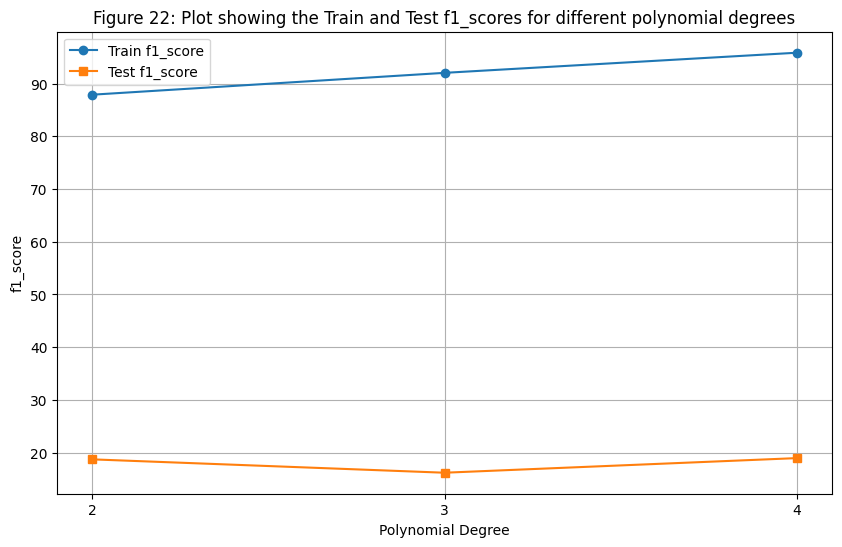

In [ ]:
# Plotting the train vs test f1_scores
fig+=1
scores_train = list(f1_scores_tr.values())
scores_test = list(f1_scores_ts.values())
plt.figure(figsize=(10, 6))
plt.plot([2, 3, 4], scores_train, marker='o', label='Train f1_score')
plt.plot([2, 3, 4], scores_test, marker='s', label='Test f1_score')
plt.title(f'Figure {fig}: Plot showing the Train and Test f1_scores for different polynomial degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('f1_score')
plt.xticks([2, 3, 4])
plt.legend()
plt.grid(True)
plt.show()

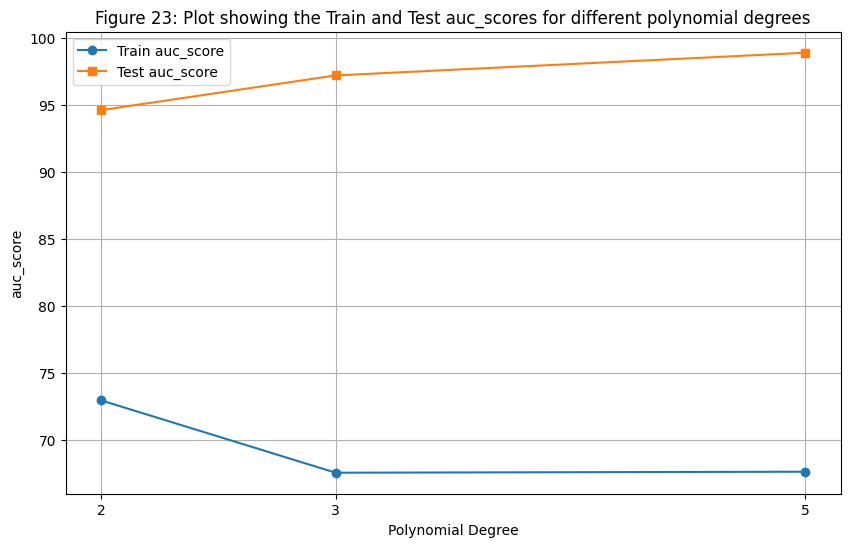

In [ ]:
# plot the train vs test roc_auc scores
fig+=1
scores_train = list(auc_scores_tr.values())
scores_test = list(auc_scores_ts.values())
plt.figure(figsize=(10, 6))
plt.plot([2, 3, 5], scores_train, marker='o', label='Train auc_score')
plt.plot([2, 3, 5], scores_test, marker='s', label='Test auc_score')
plt.title(f'Figure {fig}: Plot showing the Train and Test auc_scores for different polynomial degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('auc_score')
plt.xticks([2, 3, 5])
plt.legend()
plt.grid(True)
plt.show()

While degree 4 exhibits the highest F1 score at 18.97, degree 2 achieves a notably higher ROC AUC score of 72.95 compared to degrees 3 (67.55) and 4 (67.59). This suggests that degree 2 strikes a better balance between precision and recall while effectively discriminating between positive and negative samples. Therefore, degree 2 polynomial transformation is the optimal choice!

L2 regularization

In [ ]:
model = LogisticRegression(penalty="l2", C=10)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [ ]:
score = model.score(X_train,y_train)*100
print(f'The accuracy score is: {score}%')

The accuracy score is: 82.3130277442702%


In [ ]:
score = model.score(X_test,y_test)*100
print(f'The accuracy score is: {score}%')

The accuracy score is: 82.07357859531773%


These werethe resulsts for C=10. We will be trying different values for C parameter.

In [ ]:
scores_train={}
scores_test={}
f1_scores_tr={}
f1_scores_ts={}
auc_scores_tr={}
auc_scores_ts={}

for n in [0.001, 0.01, 1, 10, 100]:

  logistic = LogisticRegression(penalty="l2", C=n)
  logistic.fit(X_train,y_train)
  yhat=logistic.predict(X_test)
  ypred=logistic.predict(X_train)

  score_tr=logistic.score(X_train,y_train)*100
  score_ts= logistic.score(X_test,y_test)*100

  f1_ts = f1_score(y_test, yhat)*100
  f1_tr = f1_score(y_train, ypred)*100

  y_probs = logistic.predict_proba(X_test)[:, 1]  # Probabilities of class 1 for test data
  roc_auc = roc_auc_score(y_test, y_probs)*100
  auc_scores_tr[n] = roc_auc

  y_probs_tr = logistic.predict_proba(X_train)[:, 1]  # Probabilities of class 1 for train data
  roc_auc_ts = roc_auc_score(y_train, y_probs_tr)*100
  auc_scores_ts[n] = roc_auc_ts


  scores_train[n] = score_tr
  scores_test[n] = score_ts
  f1_scores_tr[n] = f1_tr
  f1_scores_ts[n] = f1_ts



We will visualize the results in a graph

In [ ]:
scores_train # train set accuracies

{0.001: 78.22677925211097,
 0.01: 80.50361881785284,
 1: 82.35826296743063,
 10: 82.3130277442702,
 100: 82.28287092882992}

In [ ]:
scores_test # test set accuracies

{0.001: 73.24414715719062,
 0.01: 75.98662207357859,
 1: 81.67224080267559,
 10: 82.07357859531773,
 100: 82.14046822742475}

In [ ]:
f1_scores_tr # F1_scores of the training data

{0.001: 79.639029892837,
 0.01: 81.51536812008578,
 1: 82.6718009478673,
 10: 82.53164556962025,
 100: 82.49143197735063}

In [ ]:
f1_scores_ts # f1_scores of test data

{0.001: 23.954372623574145,
 0.01: 22.12581344902386,
 1: 23.463687150837988,
 10: 23.863636363636363,
 100: 23.931623931623935}

In [ ]:
auc_scores_ts

{0.001: 85.25705502145536,
 0.01: 87.83845477787268,
 1: 91.35289694590398,
 10: 91.42209574225055,
 100: 91.42277781738866}

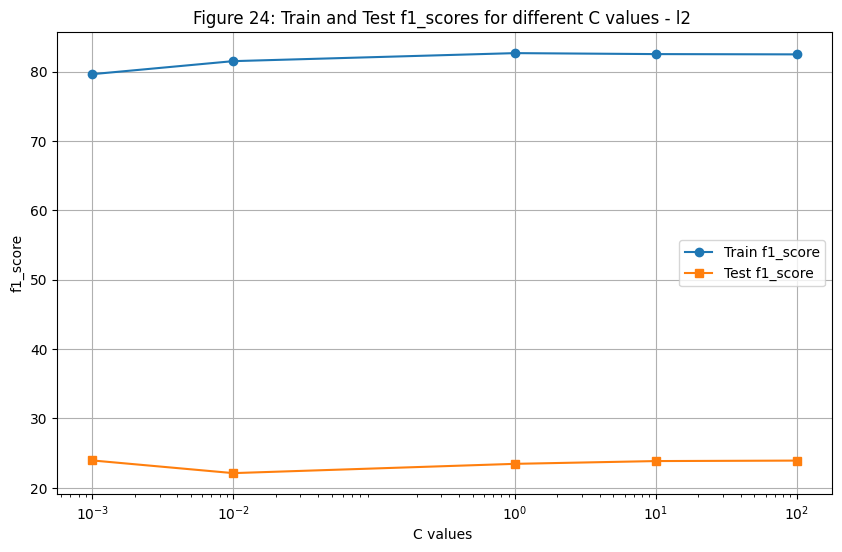

In [ ]:
# Plotting the train vs test f1_scores
fig+=1
Cs= [0.001, 0.01, 1, 10, 100]
scores_train = list(f1_scores_tr.values())
scores_test = list(f1_scores_ts.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train f1_score')
plt.plot(Cs, scores_test, marker='s', label='Test f1_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Train and Test f1_scores for different C values - l2 ')
plt.xlabel('C values ')
plt.ylabel('f1_score')
plt.xticks(Cs)
plt.legend()
plt.grid(True)
plt.show()

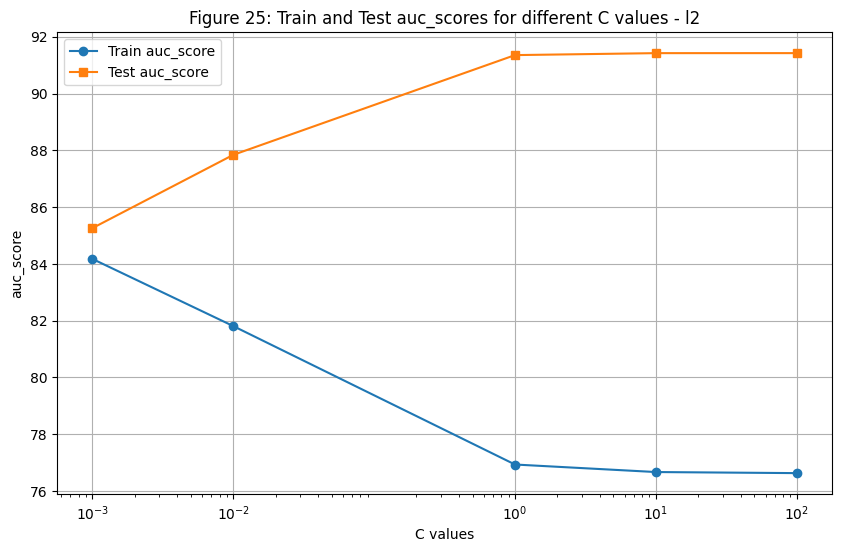

In [ ]:
# Plotting the train vs test f1_scores
fig+=1
scores_train = list(auc_scores_tr.values())
scores_test = list(auc_scores_ts.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train auc_score')
plt.plot(Cs, scores_test, marker='s', label='Test auc_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Train and Test auc_scores for different C values - l2')
plt.xlabel('C values')
plt.ylabel('auc_score')
plt.xticks ([0.001, 0.01, 1, 10, 100])
plt.legend()
plt.grid(True)
plt.show()

hile F1 score and ROC AUC score increase with higher C, minimal improvement beyond a certain point suggests diminishing returns and a risk of overfitting. Therefore, a lower value of C, such as 0.01, strikes a better balance between model complexity and generalization, making it more preferable despite not achieving the highest scores.

L2 + Polynomial Transformation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


scores_train_l2p={}
scores_test_l2p={}
f1_scores_l2p={}
f1_scores_train={}
roc_auc_scores_tr = {}
roc_auc_scores_ts = {}
conf_matrices={}
tprs={}
fprs={}


for n in  [0.001, 0.01, 1, 10, 100]:

  poly = PolynomialFeatures(degree=2)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  logistic = LogisticRegression(penalty='l2', C=n, random_state=42, max_iter=2000)
  logistic.fit(X_train_poly,y_train)
  yhat=logistic.predict(X_test_poly)
  ypred=logistic.predict(X_train_poly)

  score_tr=logistic.score(X_train_poly,y_train)*100
  score_ts= logistic.score(X_test_poly,y_test)*100

  f1 = f1_score(y_test, yhat)*100
  f1_train = f1_score(y_train, ypred)*100

  conf_matrix = confusion_matrix(y_test, yhat)
  conf_matrices[n] = conf_matrix

  y_probs = logistic.predict_proba(X_test_poly)[:, 1]  # Probabilities of class 1 for test set
  y_probs_ts = logistic.predict_proba(X_train_poly)[:, 1]  # Probabilities of class 1 for train set
  roc_auc = roc_auc_score(y_test, y_probs)*100
  roc_auc_scores_tr[n] = roc_auc
  roc_auc_tr = roc_auc_score(y_train, y_probs_ts)*100
  roc_auc_scores_ts[n] = roc_auc_tr

  fpr, tpr, _ = roc_curve(y_test, y_probs)
  tprs[n] = tpr
  fprs[n] = fpr

  scores_train_l2p[n] = score_tr
  scores_test_l2p[n] = score_ts
  f1_scores_l2p[n] = f1
  f1_scores_train[n] = f1_train


In [ ]:
scores_train_l2p # training set accuracies

{0.001: 80.44330518697225,
 0.01: 85.25331724969844,
 1: 87.42460796139927,
 10: 87.6658624849216,
 100: 87.69601930036188}

In [ ]:
f1_scores_l2p # test set f1 scores

{0.001: 24.71395881006865,
 0.01: 21.25340599455041,
 1: 18.729096989966557,
 10: 19.078947368421055,
 100: 17.880794701986755}

In [ ]:
roc_auc_scores_tr # training set auc scores

{0.001: 81.61609033168666,
 0.01: 76.72855255776922,
 1: 72.95477987079963,
 10: 72.6163979516132,
 100: 72.53949296997992}

In [ ]:
roc_auc_scores_ts # test set auc scores

{0.001: 88.37980417349955,
 0.01: 92.14485893594824,
 1: 94.60675003383093,
 10: 94.73578046129379,
 100: 94.75209569859771}

In [ ]:
f1_scores_train # trainign set f1 scores

{0.001: 81.30854589998559,
 0.01: 85.93210586881473,
 1: 87.88495061011041,
 10: 88.12082486203892,
 100: 88.14986930002904}

We conclude here that L2 regularization with coefficient C=0.001 and polynomial feature transformation with degree 2 yields the best results.


In [ ]:
# Print confusion matrices for the test set
for n, conf_matrix in conf_matrices.items():
    print(f"Confusion matrix for C={n}:\n{conf_matrix}\n")


Confusion matrix for C=0.001:
[[1112  305]
 [  24   54]]

Confusion matrix for C=0.01:
[[1167  250]
 [  39   39]]

Confusion matrix for C=1:
[[1224  193]
 [  50   28]]

Confusion matrix for C=10:
[[1220  197]
 [  49   29]]

Confusion matrix for C=100:
[[1220  197]
 [  51   27]]



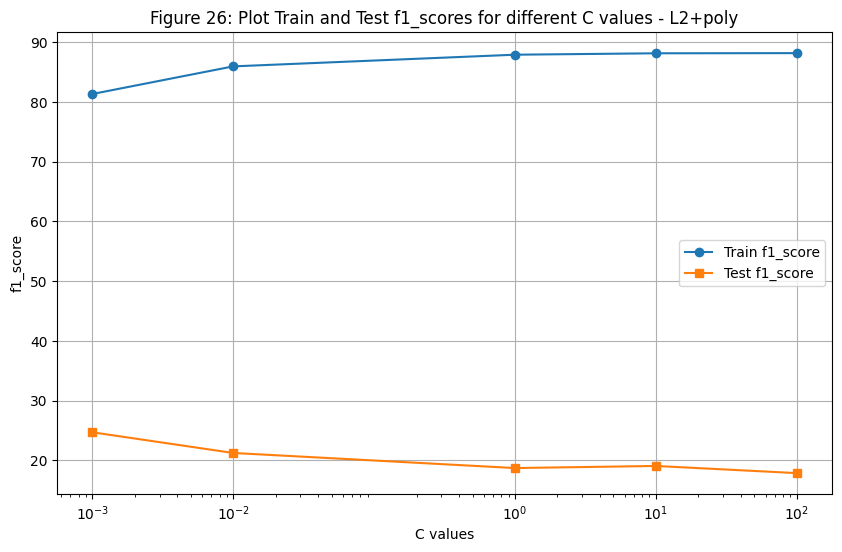

In [ ]:
# Plotting the train vs test f1_scores
Cs =  [0.001, 0.01, 1, 10, 100]
fig+=1
scores_train = list(f1_scores_train.values())
scores_test = list(f1_scores_l2p.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train f1_score')
plt.plot(Cs, scores_test, marker='s', label='Test f1_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Plot Train and Test f1_scores for different C values - L2+poly')
plt.xlabel('C values')
plt.ylabel('f1_score')
plt.xticks(Cs)
plt.legend()
plt.grid(True)
plt.show()



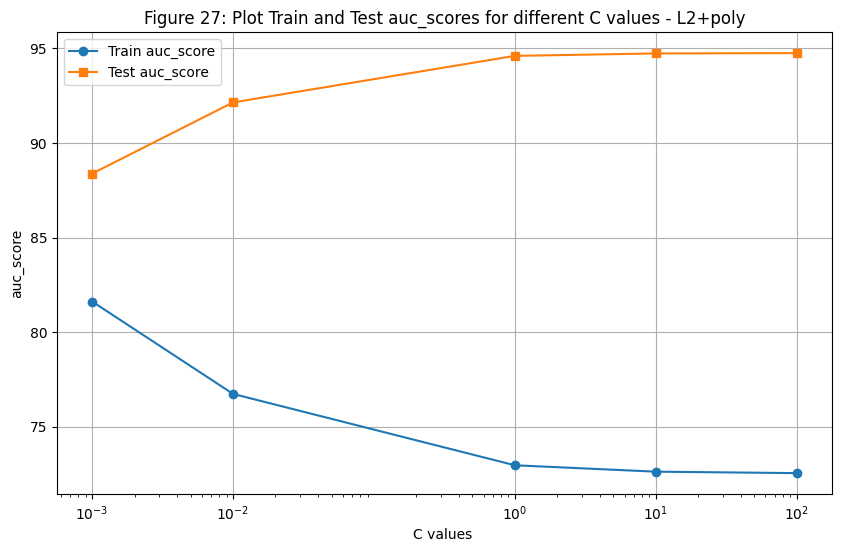

In [ ]:
# Plotting the train vs test auc_scores
fig+=1
scores_train = list(roc_auc_scores_tr.values())
scores_test = list(roc_auc_scores_ts.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train auc_score')
plt.plot(Cs, scores_test, marker='s', label='Test auc_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Plot Train and Test auc_scores for different C values - L2+poly')
plt.xlabel('C values ')
plt.ylabel('auc_score')
plt.xticks(Cs)
plt.legend()
plt.grid(True)
plt.show()



Below is a plot of the confusion matrix of the best model we got: that is L2 with C=0.001 + polynomial transformation.

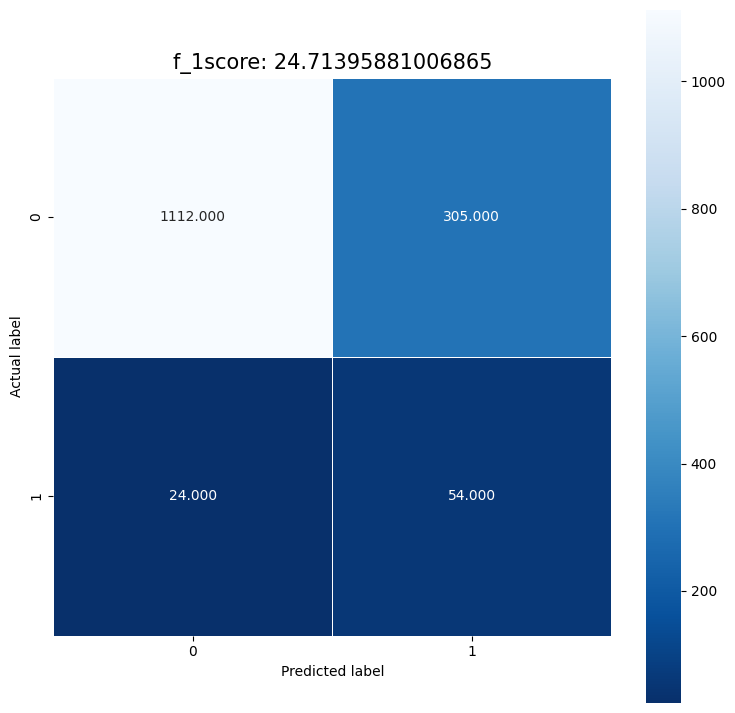

In [ ]:
# Print confusion matrix for C=0.001
cm = conf_matrices[0.001]


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'f_1score: {0}'.format(f1_scores_l2p[0.001])
plt.title(all_sample_title, size = 15)
plt.show()

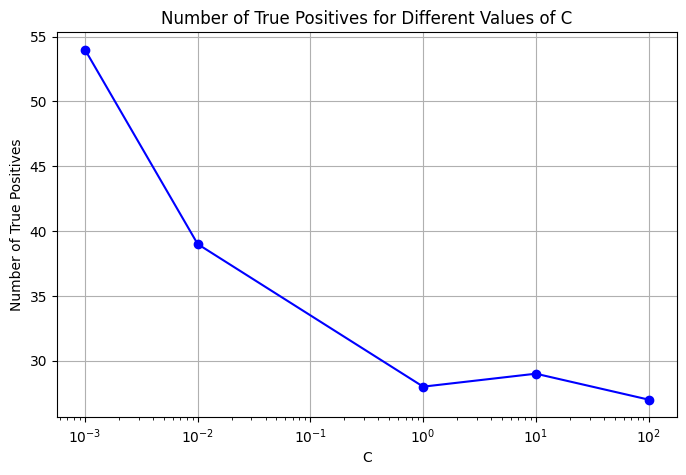

In [ ]:
true_positives = {}

# Loop over different values of C
for n, conf_matrix in conf_matrices.items():
    tp = conf_matrix[1, 1]  # Extract true positives (assuming class 1 is positive)
    true_positives[n] = tp

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(list(true_positives.keys()), list(true_positives.values()), marker='o', color='blue')
plt.title('Number of True Positives for Different Values of C')
plt.xlabel('C')
plt.ylabel('Number of True Positives')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.grid(True)
plt.show()

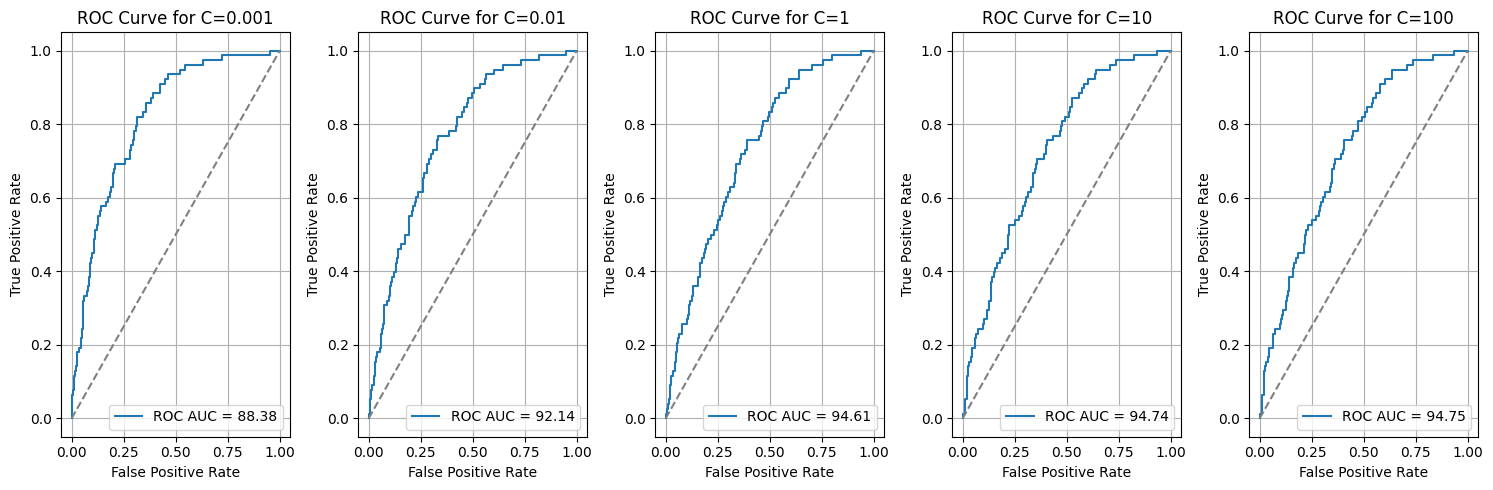

In [ ]:
# ROC curves for the test set

# Create subplots
figure, axs = plt.subplots(1, len(roc_auc_scores_ts), figsize=(15, 5))

# Loop over different values of C
for i, n in enumerate(roc_auc_scores_ts.keys()):
    ax = axs[i]
    ax.plot(fprs[n], tprs[n], label=f'ROC AUC = {roc_auc_scores_ts[n]:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_title(f'ROC Curve for C={n}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


It seems like there is some really good results with l2 + polynomial transformation. We retain l2 with 0.001 +poly as best model found so far.

L1 regularization

In [ ]:
scores_train_l1={}
scores_test_l1={}
f1_scores_l1={}
f1_scores_l1_tr={}
auc_scores_ts={}
auc_scores_tr={}

for n in [0.001, 0.01, 1, 10, 100, 1000]:

  logistic = LogisticRegression(solver='liblinear', penalty="l1", C=n)
  logistic.fit(X_train,y_train)
  yhat=logistic.predict(X_test)
  ypred=logistic.predict(X_train) # prediction on training set

  score_tr=logistic.score(X_train,y_train)*100
  score_ts= logistic.score(X_test,y_test)*100

  f1 = f1_score(y_test, yhat)*100
  f1_train = f1_score(y_train, ypred)*100

  y_probs = logistic.predict_proba(X_test)[:, 1]  # Probabilities of class 1 for test set
  roc_auc = roc_auc_score(y_test, y_probs)*100
  auc_scores_ts[n] = roc_auc
  y_probs_tr = logistic.predict_proba(X_train)[:, 1]  # Probabilities of class 1 for train set
  roc_auc = roc_auc_score(y_train, y_probs_tr)*100
  auc_scores_tr[n] = roc_auc

  scores_train_l1[n] = score_tr
  scores_test_l1[n] = score_ts
  f1_scores_l1[n] = f1
  f1_scores_l1_tr[n] = f1_train


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
scores_train_l1 # accuries for the training set

{0.001: 73.79372738238843,
 0.01: 78.18154402895054,
 1: 82.3130277442702,
 10: 82.29794933655006,
 100: 82.28287092882992,
 1000: 82.28287092882992}

In [ ]:
scores_test_l1 # accuracies for the test set

{0.001: 52.508361204013376,
 0.01: 72.77591973244148,
 1: 82.0066889632107,
 10: 82.14046822742475,
 100: 82.14046822742475,
 1000: 82.14046822742475}

In [ ]:
f1_scores_l1 # f1 scores for the test set

{0.001: 17.441860465116278,
 0.01: 23.35216572504708,
 1: 23.79603399433428,
 10: 23.931623931623935,
 100: 23.931623931623935,
 1000: 23.931623931623935}

In [ ]:
f1_scores_l1_tr # f1 scores for the training set

{0.001: 78.81004633016339,
 0.01: 79.6798202499649,
 1: 82.55243195002231,
 10: 82.50893921334922,
 100: 82.49143197735063,
 1000: 82.49143197735063}

In [ ]:
auc_scores_ts # auc scores for the test set

{0.001: 83.28221413965944,
 0.01: 83.41928595986465,
 1: 76.77107648878996,
 10: 76.64712375368691,
 100: 76.62721893491124,
 1000: 76.62540940593162}

In [ ]:
auc_scores_tr # auc scores for the train set

{0.001: 83.98096064553772,
 0.01: 84.949616473697,
 1: 91.4157478962984,
 10: 91.42318706247153,
 100: 91.42305064744392,
 1000: 91.42305064744392}

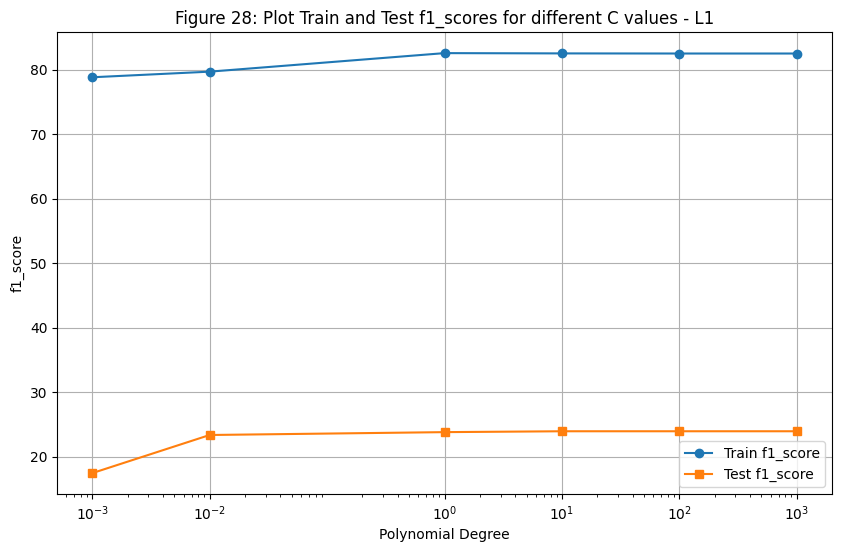

In [ ]:
# Plotting the train vs test f1_scores
fig+=1
Cs= [0.001, 0.01, 1, 10, 100, 1000]
scores_train = list(f1_scores_l1_tr.values())
scores_test = list(f1_scores_l1.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train f1_score')
plt.plot(Cs, scores_test, marker='s', label='Test f1_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Plot Train and Test f1_scores for different C values - L1')
plt.xlabel('Polynomial Degree')
plt.ylabel('f1_score')
plt.xticks(Cs)
plt.legend()
plt.grid(True)
plt.show()



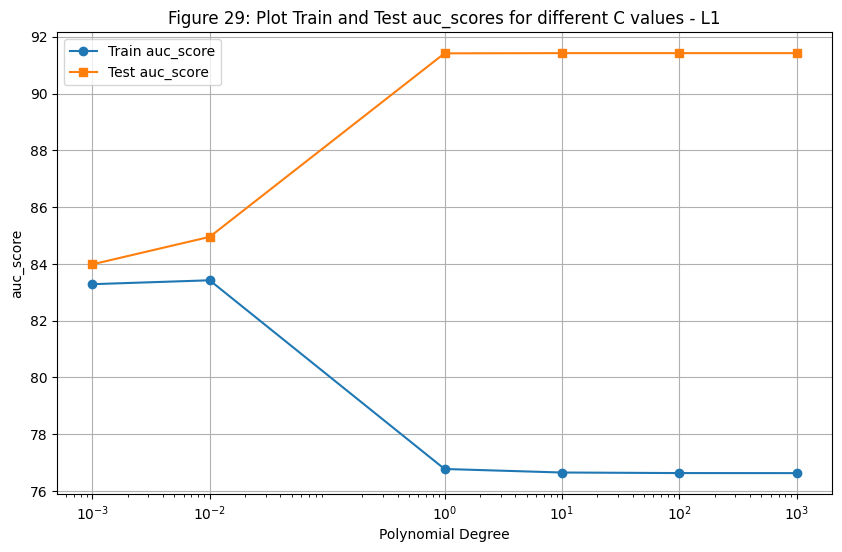

In [ ]:
# Plotting the train vs test auc_scores
fig+=1
scores_train = list(auc_scores_ts.values())
scores_test = list(auc_scores_tr.values())
plt.figure(figsize=(10, 6))
plt.plot(Cs, scores_train, marker='o', label='Train auc_score')
plt.plot(Cs, scores_test, marker='s', label='Test auc_score')
plt.xscale('log')
plt.title(f'Figure {fig}: Plot Train and Test auc_scores for different C values - L1')
plt.xlabel('Polynomial Degree')
plt.ylabel('auc_score')
plt.xticks(Cs)
plt.legend()
plt.grid(True)
plt.show()



It seems that the best results are with a value of 10.

L1 + polynomial transformation

In [ ]:
scores_train_l1p={}
scores_test_l1p={}
f1_scores_l1p={}
f1_scores_l1p_tr={}
weighted_f1_l1p={}
roc_auc_scores_l1 = {}
roc_auc_scores_l1_tr = {}
tprs_l1={}
fprs_l1={}
conf_matrices_l1p={}


for n in [0.001, 0.01, 1, 10, 100, 1000]:

  poly = PolynomialFeatures(degree=2)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  logistic = LogisticRegression(solver='liblinear', penalty='l1', C=n, random_state=42, max_iter=500)
  logistic.fit(X_train_poly,y_train)
  yhat=logistic.predict(X_test_poly)
  ypred=logistic.predict(X_train_poly)

  score_tr=logistic.score(X_train_poly,y_train)*100
  score_ts= logistic.score(X_test_poly,y_test)*100

  report = classification_report(y_test, yhat, output_dict=True)
  w_f1 = report['weighted avg']['f1-score']*100
  f1 = f1_score(y_test, yhat)*100
  f1_tr = f1_score(y_train, ypred)*100

  conf_matrix_l1p = confusion_matrix(y_test, yhat)
  conf_matrices_l1p[n] = conf_matrix_l1p

  y_probs = logistic.predict_proba(X_test_poly)[:, 1]  # Probabilities of class 1 for test set
  roc_auc = roc_auc_score(y_test, y_probs)*100
  roc_auc_scores_l1[n] = roc_auc
  y_probs_tr = logistic.predict_proba(X_train_poly)[:, 1]  # Probabilities of class 1 for train set
  roc_auc_tr = roc_auc_score(y_train, y_probs_tr)*100
  roc_auc_scores_l1_tr[n] = roc_auc_tr

  fpr, tpr, _ = roc_curve(y_test, y_probs)
  tprs_l1[n] = tpr
  fprs_l1[n] = fpr

  scores_train_l1p[n] = score_tr
  scores_test_l1p[n] = score_ts
  f1_scores_l1p[n] = f1
  f1_scores_l1p_tr[n] = f1_tr
  weighted_f1_l1p[n] = w_f1


In [ ]:
scores_train_l1p # accuracies for train set

{0.001: 73.79372738238843,
 0.01: 79.68938480096502,
 1: 87.48492159227985,
 10: 87.71109770808204,
 100: 87.72617611580216,
 1000: 87.69601930036188}

In [ ]:
scores_test_l1p # accuries for the test set

{0.001: 52.508361204013376,
 0.01: 73.51170568561874,
 1: 83.61204013377926,
 10: 83.47826086956522,
 100: 83.4113712374582,
 1000: 83.4113712374582}

In [ ]:
f1_scores_l1p #f1 for the test set

{0.001: 17.441860465116278,
 0.01: 22.957198443579767,
 1: 18.6046511627907,
 10: 18.48184818481848,
 100: 17.880794701986755,
 1000: 17.880794701986755}

In [ ]:
roc_auc_scores_l1 # auc scores for the test set

{0.001: 83.28221413965944,
 0.01: 83.05195157700452,
 1: 72.93125599406474,
 10: 72.76839838590014,
 100: 72.79735084957386,
 1000: 72.67611240794021}

In [ ]:
# Print confusion matrices
for n, conf_matrix in conf_matrices_l1p.items():
    print(f"Confusion matrix for C={n}:\n{conf_matrix}\n")


Confusion matrix for C=0.001:
[[710 707]
 [  3  75]]

Confusion matrix for C=0.01:
[[1040  377]
 [  19   59]]

Confusion matrix for C=1:
[[1222  195]
 [  50   28]]

Confusion matrix for C=10:
[[1220  197]
 [  50   28]]

Confusion matrix for C=100:
[[1220  197]
 [  51   27]]

Confusion matrix for C=1000:
[[1220  197]
 [  51   27]]



It seems like C=0.01 still works best with L1 regularization even after adding polynomial transformation.

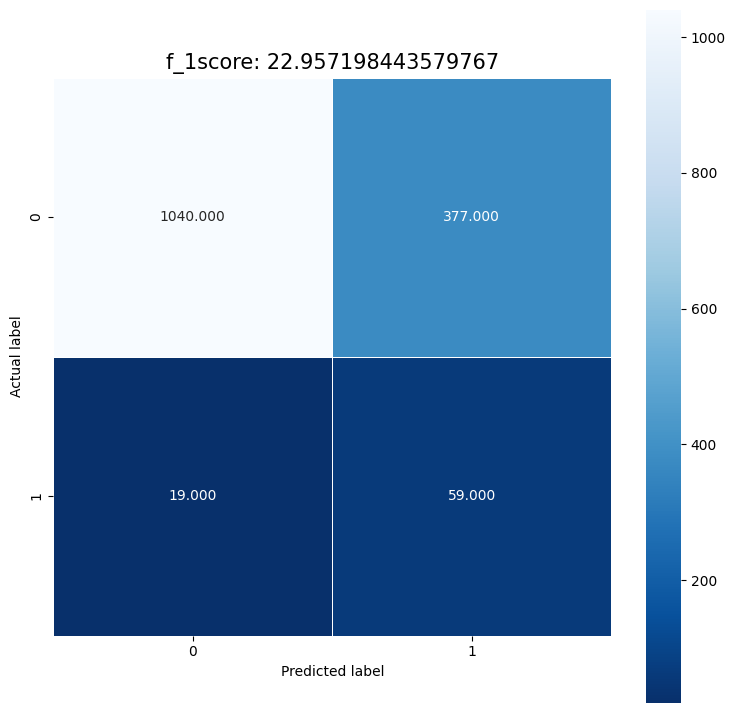

In [ ]:
# Print confusion matrix for C=0.01
cm = conf_matrices_l1p[0.01]


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'f_1score: {0}'.format(f1_scores_l1p[0.01])
plt.title(all_sample_title, size = 15)
plt.show()

Conclusion: which combination was best?
+ l2 + polynomial 0.001:

  f1_score = 24.714

  auc_score = 88.379

+ L1 + polynomial 0.01:

  f1_score = 22.95

  auc_score = 83.052

## Cross validation

We will be doing cross validation using the test set to get a more accuarte evaluation of the performance of the model.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import numpy as np

# Constants
degrees = [2]  # Keep degree constant at 2
C_values = [0.001, 0.01, 1, 0.1, 10, 100]  # Values of C to try
f1_scores = {"train": [], "val": []}
auc_scores = {"train": [], "val": []}
accuracy_scores = {"train": [], "val": []}

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for c in C_values:
    local_f1 = {"train": [], "val": []}
    local_auc = {"train": [], "val": []}
    local_accuracy = {"train": [], "val": []}

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]

        scaler = StandardScaler()
        numeric_columns = ['age', 'avg_glucose_level', 'bmi']
        X_train_fold.loc[:, numeric_columns] = scaler.fit_transform(X_train_fold[numeric_columns])
        X_val_fold.loc[:, numeric_columns] = scaler.transform(X_val_fold[numeric_columns])

        smote = SMOTE(random_state=42)
        X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        model = LogisticRegression(penalty='l2', C=c, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)

        local_f1["train"].append(f1_score(y_train_fold, y_train_pred))
        local_f1["val"].append(f1_score(y_val_fold, y_val_pred))

        local_auc["train"].append(roc_auc_score(y_train_fold, model.decision_function(X_train_fold)))
        local_auc["val"].append(roc_auc_score(y_val_fold, model.decision_function(X_val_fold)))

        local_accuracy["train"].append(accuracy_score(y_train_fold, y_train_pred))
        local_accuracy["val"].append(accuracy_score(y_val_fold, y_val_pred))

    f1_scores["train"].append(np.mean(local_f1["train"]))
    f1_scores["val"].append(np.mean(local_f1["val"]))
    auc_scores["train"].append(np.mean(local_auc["train"]))
    auc_scores["val"].append(np.mean(local_auc["val"]))
    accuracy_scores["train"].append(np.mean(local_accuracy["train"]))
    accuracy_scores["val"].append(np.mean(local_accuracy["val"]))


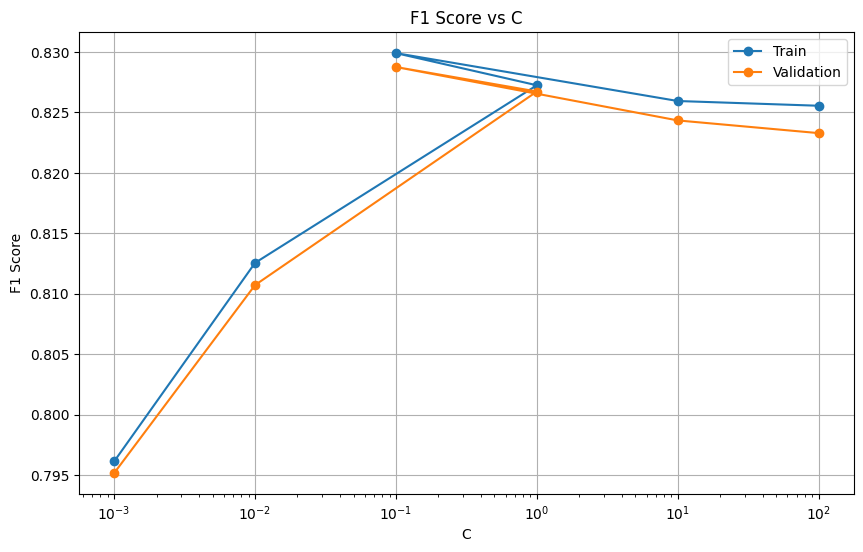

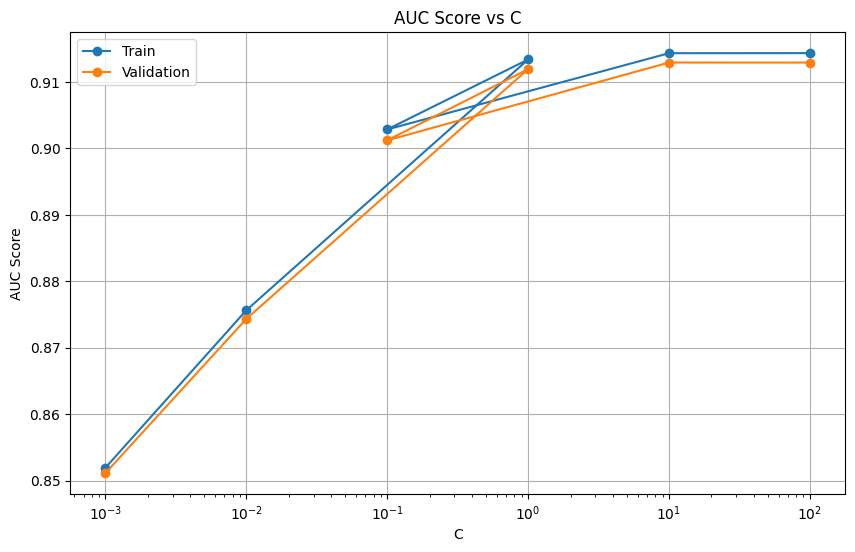

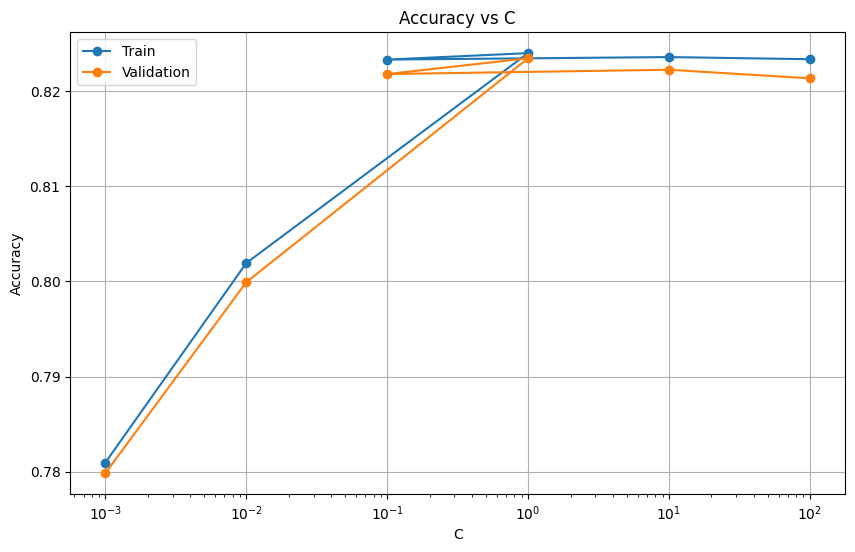

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting F1 scores
plt.plot(C_values, f1_scores["train"], marker='o', label='Train')
plt.plot(C_values, f1_scores["val"], marker='o', label='Validation')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('F1 Score vs C')
plt.legend()
plt.grid(True)
plt.show()

# Plotting AUC scores
plt.figure(figsize=(10, 6))
plt.plot(C_values, auc_scores["train"], marker='o', label='Train')
plt.plot(C_values, auc_scores["val"], marker='o', label='Validation')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC Score')
plt.title('AUC Score vs C')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracy_scores["train"], marker='o', label='Train')
plt.plot(C_values, accuracy_scores["val"], marker='o', label='Validation')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.legend()
plt.grid(True)
plt.show()

### SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The following function is used to resample and overfit the triaining set.

In [ ]:
def scale_resample(X_train, X_val, y_train, y_val):
    numeric_columns = ['age', 'avg_glucose_level', 'bmi']
    scaler = StandardScaler()
    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, X_val, y_train, y_val

The following function is used to evaluate the model on differnet performance metrics.

In [ ]:
def model_evaluation(y_test, y_pred, X_val, model):
    # accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.decision_function(X_val))

    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print(f'AUC: {auc}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues');

The following function is used to make the plots that demonstrate the changes in the performance metrics with changing hyperparameters.

In [ ]:
def plot_metrics(metrics, C_values, title, x, log_scale=False):
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, metrics["train"], marker='o', linestyle='-', color='blue', label='Train')
    plt.plot(C_values, metrics["val"], marker='s', linestyle='--', color='red', label='Validation')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('Score')
    if log_scale:
        plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Linear

Since our data set is imbalanced, accuracy wouldn't be the best metric to evaluate the performance of our model. The 19:1 ratio of our target class means that any model which predicts 0 for all instances will have an accuracy of 95%. Thus we should look into other metrics such as F1 score and ROC_AUC to evaluate the performance of our model. In a scenario where identifying a high percentage of the positive cases (high recall) and minimizing the number of false positives (high precision) is important, the F1 score is a good metric to use. The ROC_AUC score is also a good metric to use as it gives a good indication of how well the model is able to distinguish between the two classes. ROC is a curve that plots the true positive rate (TPR, or recall) against the false positive rate (FPR), and AUC represents the area beneath this curve.

Below we are using a simple linear kernel to train our svm model with changing the regularization parameter C. We are using soft margin SVM since out data is not linearly separable.

**High C value** means that the model will put more emphasis on minimizing training error by choosing smaller margin hyperplane. This can lead to overfitting.

**Low C value** means that the model will put more emphasis on maximizing the margin by choosing a larger margin hyperplane. This can lead to underfitting.

In [ ]:
X_train_val, X_val, y_train_val, y_val = X_train, X_test, y_train, y_test
X_train_val, X_val, y_train_val, y_val = scale_resample(X_train_val, X_val, y_train_val, y_val)
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
f1 = {"train": [], "val": []}
auc = {"train": [], "val": []}
accuracy = {"train": [], "val": []}
for c in C_values:
    model = SVC(kernel='linear', C=c, random_state=42)
    model.fit(X_train_val, y_train_val)
    y_train_pred = model.predict(X_train_val)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training data
    f1["train"].append(f1_score(y_train_val, y_train_pred))
    auc["train"].append(roc_auc_score(y_train_val, model.decision_function(X_train_val)))
    accuracy["train"].append(accuracy_score(y_train_val, y_train_pred))

    # Calculate metrics for validation data
    f1["val"].append(f1_score(y_val, y_val_pred))
    auc["val"].append(roc_auc_score(y_val, model.decision_function(X_val)))
    accuracy["val"].append(accuracy_score(y_val, y_val_pred))

    # Print current C value
    print(f'C: {c}, Train F1: {f1["train"][-1]}, Val F1: {f1["val"][-1]}')
    print(f'C={c} Train AUC: {auc["train"][-1]}, Val AUC: {auc["val"][-1]}')
    print(f'C={c} Train Accuracy: {accuracy["train"][-1]}, Val Accuracy: {accuracy["val"][-1]}')

C: 0.0001, Train F1: 0.7871625824107477, Val F1: 0.17826617826617827
C=0.0001 Train AUC: 0.8316312072475303, Val AUC: 0.8404990680925756
C=0.0001 Train Accuracy: 0.7420084439083233, Val Accuracy: 0.5498327759197325
C: 0.001, Train F1: 0.8097035040431269, Val F1: 0.22673434856175972
C=0.001 Train AUC: 0.859290991078821, Val AUC: 0.8382100139333731
C=0.001 Train Accuracy: 0.7870928829915561, Val Accuracy: 0.6943143812709031
C: 0.01, Train F1: 0.8316498316498316, Val F1: 0.226890756302521
C=0.01 Train AUC: 0.8873286445366328, Val AUC: 0.8148128042270598
C=0.01 Train Accuracy: 0.8190591073582629, Val Accuracy: 0.7538461538461538
C: 0.1, Train F1: 0.83633197910621, Val F1: 0.22784810126582278
C=0.1 Train AUC: 0.9080659113760676, Val AUC: 0.7738722110634602
C=0.1 Train Accuracy: 0.8299155609167672, Val Accuracy: 0.7959866220735786
C: 1, Train F1: 0.8338973076357217, Val F1: 0.2228260869565217
C=1 Train AUC: 0.9120294954753863, Val AUC: 0.7602916960715126
C=1 Train Accuracy: 0.829764776839565

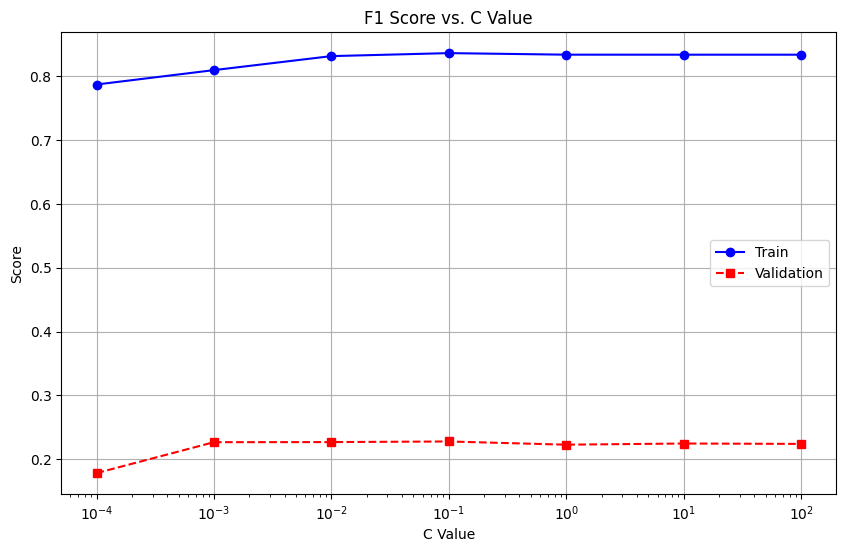

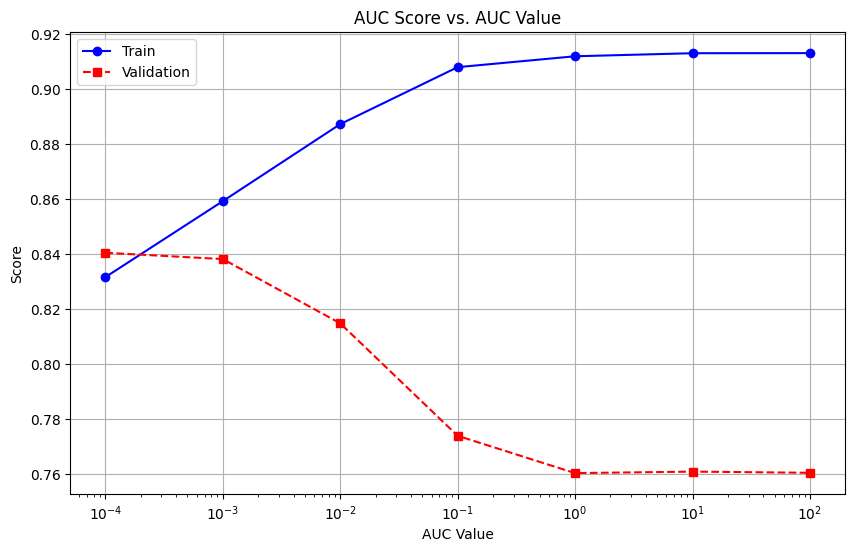

In [ ]:
plot_metrics(f1, C_values, 'F1 Score vs. C Value', 'C Value', True)
plot_metrics(auc, C_values, 'AUC Score vs. AUC Value', 'AUC Value', True)

After dividing our data set in to training and validation with 70 - 30 ratio, we oversampled our training set using SMOTE over sampling technique discussed previously. We trained our model on the training set by changing the hyperparameter C (which is the regularization parameter to penalize incorrect predictions) to identify the best hyper-parameter which gives the best F1 score while maintaining a good AUC. As can be seen in the graphs above, the more overfit we make our model by increasing the value of C and reducing bias, the more we increase the F1 score of our training set. However the F1 score of our validation set initially increases along with the training set and later start to decreases. Our AUC score also increases with the increase in C value. However it quickly starts to decrease as our model starts to get complex. We chose a C value of 0.001 which had a reasonable AUC score while also not sacrificing a lot of F1.

Precision: 0.135678391959799
Recall: 0.6923076923076923
F1: 0.226890756302521
AUC: 0.8148128042270598


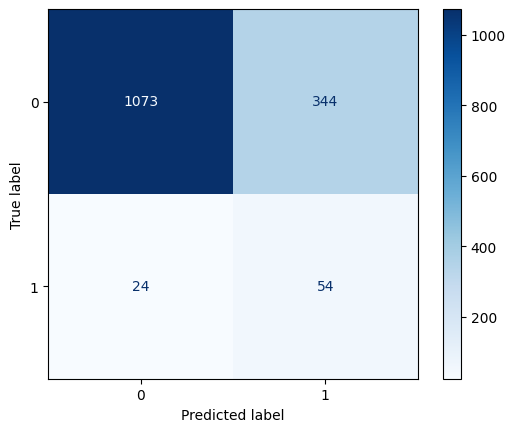

In [ ]:
model = SVC(kernel='linear', C=10E-3, random_state=42)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = scale_resample(X_train, X_test, y_train, y_test)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_resampled)
model_evaluation(y_test_resampled, y_pred, X_test_resampled, model)

Evaluating our model on the test set, we got an F1 score of 0.21 and an AUC score of 0.80. This is a good indication that our model is able to distinguish between the two classes. However, the F1 score is not very high. This is due to the fact that our data set is imbalanced and we have a lot of false negatives. We can try to improve our model by using a different kernel or by using a different model altogether.

#### RBF Kernel

The RBF kernel helps us to classify data which is not linearly separable. It is particularly powerful because it can map inputs into a higher dimensional space where the data is linearly separable by a hyperplane. The RBF kernel has two hyperparameters, C and gamma. C is the regularization parameter which penalizes incorrect predictions - similar to linear kernel. Gamma is the hyperparameter of the RBF kernel and controls the distance of influence of a single training example.

**Large gamma** means that the radius of the area of influence of the support vectors only includes the support vector is a narrow space which leads to a more complex model. This can lead to overfitting.

**Small gamma** means that the radius of the area of influence of the support vectors is large which leads to a smoother decision boundary. This can lead to underfitting.

We are fist training our model with changing values of C to see how the F1 score and AUC score changes with changing C. We are keeping gamma on auto mode.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = X_train, X_test, y_train, y_test
X_train_val, X_val, y_train_val, y_val = scale_resample(X_train_val, X_val, y_train_val, y_val)
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
f1 = {"train": [], "val": []}
auc = {"train": [], "val": []}
accuracy = {"train": [], "val": []}
for c in C_values:
    model = SVC(kernel='rbf', C=c, random_state=42, gamma='auto')
    model.fit(X_train_val, y_train_val)
    y_train_pred = model.predict(X_train_val)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training data
    f1["train"].append(f1_score(y_train_val, y_train_pred))
    auc["train"].append(roc_auc_score(y_train_val, model.decision_function(X_train_val)))
    accuracy["train"].append(accuracy_score(y_train_val, y_train_pred))

    # Calculate metrics for validation data
    f1["val"].append(f1_score(y_val, y_val_pred))
    auc["val"].append(roc_auc_score(y_val, model.decision_function(X_val)))
    accuracy["val"].append(accuracy_score(y_val, y_val_pred))

    # Print current C value
    print(f'C: {c}, Train F1: {f1["train"][-1]}, Val F1: {f1["val"][-1]}')
    print(f'C={c} Train AUC: {auc["train"][-1]}, Val AUC: {auc["val"][-1]}')
    print(f'C={c} Train Accuracy: {accuracy["train"][-1]}, Val Accuracy: {accuracy["val"][-1]}')

C: 0.0001, Train F1: 0.7876976715228489, Val F1: 0.17761557177615572
C=0.0001 Train AUC: 0.8425355879524068, Val AUC: 0.8374681070517344
C=0.0001 Train Accuracy: 0.742913148371532, Val Accuracy: 0.5478260869565217
C: 0.001, Train F1: 0.7876976715228489, Val F1: 0.17761557177615572
C=0.001 Train AUC: 0.8425355879524068, Val AUC: 0.8374681070517344
C=0.001 Train Accuracy: 0.742913148371532, Val Accuracy: 0.5478260869565217
C: 0.01, Train F1: 0.8044121603443637, Val F1: 0.21568627450980393
C=0.01 Train AUC: 0.8654814140890894, Val AUC: 0.8336771438394587
C=0.01 Train Accuracy: 0.7807599517490953, Val Accuracy: 0.6789297658862876
C: 0.1, Train F1: 0.8381800473076387, Val F1: 0.2259414225941423
C=0.1 Train AUC: 0.9024251499837759, Val AUC: 0.8104970776106979
C=0.1 Train Accuracy: 0.8246381182147166, Val Accuracy: 0.7525083612040134
C: 1, Train F1: 0.8766809728183118, Val F1: 0.20396600566572237
C=1 Train AUC: 0.9392422927328259, Val AUC: 0.7555416825000453
C=1 Train Accuracy: 0.870024125452

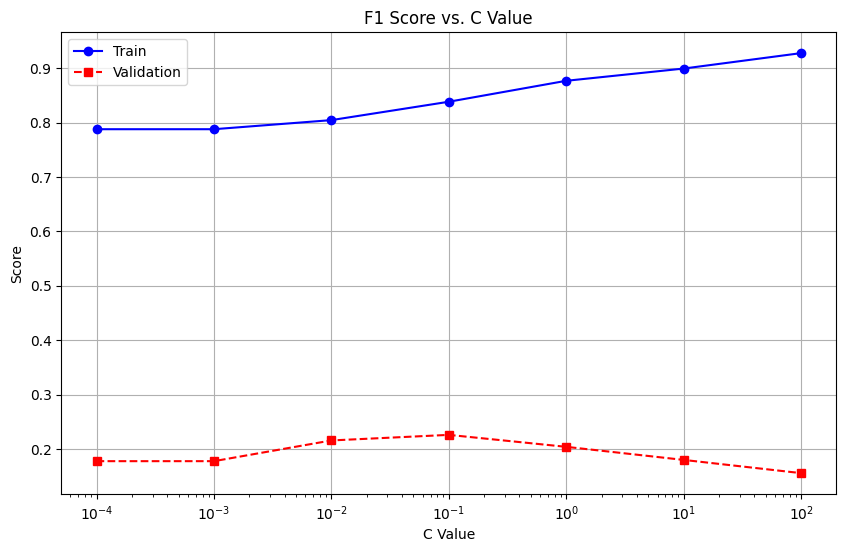

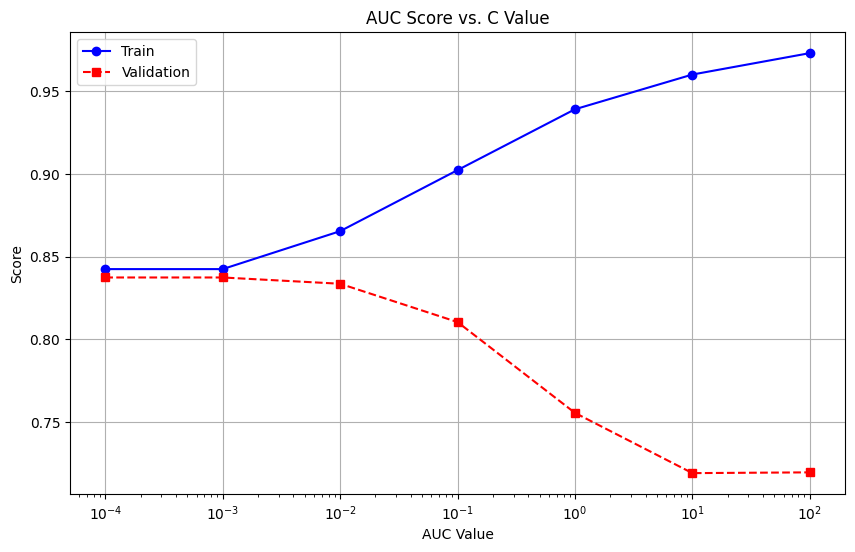

In [ ]:
plot_metrics(f1, C_values, 'F1 Score vs. C Value','C Value', True)
plot_metrics(auc, C_values, 'AUC Score vs. C Value','AUC Value', True)

As can be seen in the graphs above, the more overfit we make our model by increasing the value of C and reducing bias, the more we increase the F1 score of our training set. However the F1 score of our validation set initially increases along with the training set and later start to decreases. Our AUC score also increases with the increase in C value. However it quickly starts to decrease as our model starts to get complex. We chose a C value of 0.01 which had a reasonable AUC score while also not sacrificing a lot of F1.

Next we are training our model with changing values of gamma to see how the F1 score and AUC score changes with changing gamma. We are keeping C constant at 0.01.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = X_train, X_test, y_train, y_test
X_train_val, X_val, y_train_val, y_val = scale_resample(X_train_val, X_val, y_train_val, y_val)
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
f1 = {"train": [], "val": []}
auc = {"train": [], "val": []}
accuracy = {"train": [], "val": []}
for g in gamma_values:
    model = SVC(kernel='rbf', C=0.01, random_state=42, gamma=g)
    model.fit(X_train_val, y_train_val)
    y_train_pred = model.predict(X_train_val)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training data
    f1["train"].append(f1_score(y_train_val, y_train_pred))
    auc["train"].append(roc_auc_score(y_train_val, model.decision_function(X_train_val)))
    accuracy["train"].append(accuracy_score(y_train_val, y_train_pred))

    # Calculate metrics for validation data
    f1["val"].append(f1_score(y_val, y_val_pred))
    auc["val"].append(roc_auc_score(y_val, model.decision_function(X_val)))
    accuracy["val"].append(accuracy_score(y_val, y_val_pred))

    # Print current C value
    print(f'gamma: {g}, Train F1: {f1["train"][-1]}, Val F1: {f1["val"][-1]}')
    print(f'gamma={g} Train AUC: {auc["train"][-1]}, Val AUC: {auc["val"][-1]}')
    print(f'gamma={g} Train Accuracy: {accuracy["train"][-1]}, Val Accuracy: {accuracy["val"][-1]}')

gamma: 0.0001, Train F1: 0.7889862327909887, Val F1: 0.18227215980024966
gamma=0.0001 Train AUC: 0.828679640766485, Val AUC: 0.8390333496190941
gamma=0.0001 Train Accuracy: 0.7457780458383595, Val Accuracy: 0.5618729096989966
gamma: 0.001, Train F1: 0.7889403227824345, Val F1: 0.1818181818181818
gamma=0.001 Train AUC: 0.8288689848248286, Val AUC: 0.8390423972639921
gamma=0.001 Train Accuracy: 0.745627261761158, Val Accuracy: 0.5605351170568562
gamma: 0.01, Train F1: 0.7899201596806387, Val F1: 0.181592039800995
gamma=0.01 Train AUC: 0.8447823434573897, Val AUC: 0.8429147892803504
gamma=0.01 Train Accuracy: 0.7460796139927623, Val Accuracy: 0.559866220735786
gamma: 0.1, Train F1: 0.8065653825284862, Val F1: 0.2184873949579832
gamma=0.1 Train AUC: 0.8717386804628944, Val AUC: 0.8317409478312795
gamma=0.1 Train Accuracy: 0.7849819059107358, Val Accuracy: 0.6889632107023411
gamma: 1, Train F1: 0.8027993001749562, Val F1: 0.1802030456852792
gamma=1 Train AUC: 0.9158215604133048, Val AUC: 0.

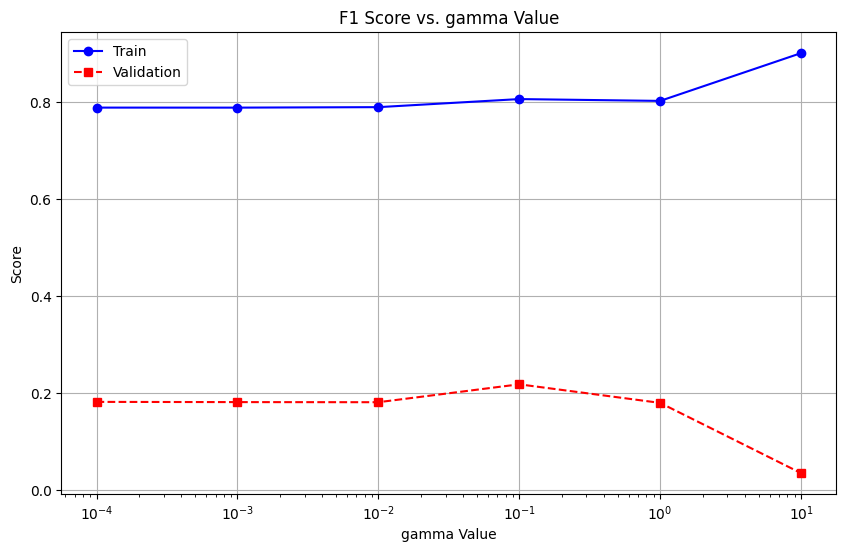

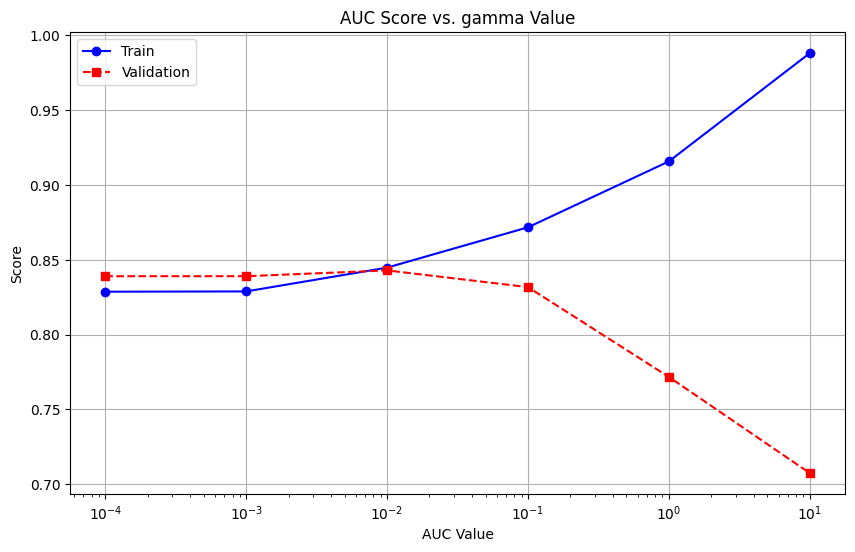

In [ ]:
plot_metrics(f1, gamma_values, 'F1 Score vs. gamma Value','gamma Value', True)
plot_metrics(auc, gamma_values, 'AUC Score vs. gamma Value','AUC Value', True)

Similarly with gamma values, the more overfit we make our model by increasing the value of gamma and reducing bias, the more we increase the F1 score of our training set. However the F1 score of our validation set initially increases along with the training set and later start to decreases. Our AUC score also increases with the increase in gamma value. However it quickly starts to decrease as our model starts to get complex. We chose a gamma value of 0.1 which had a reasonable AUC score while also not sacrificing a lot of F1.

Precision: 0.12572533849129594
Recall: 0.8333333333333334
F1: 0.2184873949579832
AUC: 0.8317409478312795


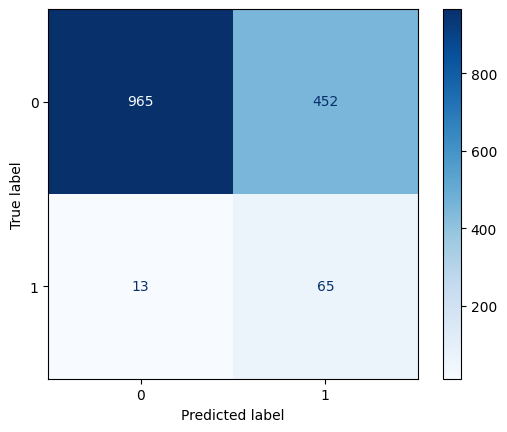

In [ ]:
model = SVC(kernel='rbf', C=0.01, random_state=42, gamma=0.1)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = scale_resample(X_train, X_test, y_train, y_test)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_resampled)
model_evaluation(y_test_resampled, y_pred, X_test_resampled, model)

#### Polynomial Kernel

For the polynomial kernel we have three hyperparameters, C, degree and gamma. C is the regularization parameter which penalizes incorrect predictions - similar to linear kernel. Degree is the degree of the polynomial and gamma is the hyperparameter of the RBF kernel and controls the distance of influence of a single training example.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_val = X_train, X_test, y_train, y_test
X_train_val, X_val, y_train_val, y_val = scale_resample(X_train_val, X_val, y_train_val, y_val)
degrees = [2,3,4,5, 6, 7, 8]
f1 = {"train": [], "val": []}
auc = {"train": [], "val": []}
accuracy = {"train": [], "val": []}
for d in degrees:
    model = SVC(kernel='poly', C=0.1, random_state=42, degree=d)
    model.fit(X_train_val, y_train_val)
    y_train_pred = model.predict(X_train_val)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for training data
    f1["train"].append(f1_score(y_train_val, y_train_pred))
    auc["train"].append(roc_auc_score(y_train_val, model.decision_function(X_train_val)))
    accuracy["train"].append(accuracy_score(y_train_val, y_train_pred))

    # Calculate metrics for validation data
    f1["val"].append(f1_score(y_val, y_val_pred))
    auc["val"].append(roc_auc_score(y_val, model.decision_function(X_val)))
    accuracy["val"].append(accuracy_score(y_val, y_val_pred))

    # Print current C value
    print(f'd: {d}, Train F1: {f1["train"][-1]}, Val F1: {f1["val"][-1]}')
    print(f'd={d} Train AUC: {auc["train"][-1]}, Val AUC: {auc["val"][-1]}')
    print(f'd={d} Train Accuracy: {accuracy["train"][-1]}, Val Accuracy: {accuracy["val"][-1]}')

d: 2, Train F1: 0.8577586206896552, Val F1: 0.2037533512064343
d=2 Train AUC: 0.917232728402409, Val AUC: 0.75519787199392
d=2 Train Accuracy: 0.8507237635705669, Val Accuracy: 0.8013377926421404
d: 3, Train F1: 0.8655005144789063, Val F1: 0.19808306709265172
d=3 Train AUC: 0.9291813206720786, Val AUC: 0.7050286810343267
d=3 Train Accuracy: 0.8620325693606755, Val Accuracy: 0.8321070234113712
d: 4, Train F1: 0.874415799788934, Val F1: 0.19858156028368795
d=4 Train AUC: 0.9393001327045389, Val AUC: 0.6641695166748095
d=4 Train Accuracy: 0.8743968636911942, Val Accuracy: 0.8488294314381271
d: 5, Train F1: 0.8647388059701493, Val F1: 0.20833333333333334
d=5 Train AUC: 0.9454304421593008, Val AUC: 0.6596095036462009
d=5 Train Accuracy: 0.8688178528347407, Val Accuracy: 0.8729096989966555
d: 6, Train F1: 0.8584169453734671, Val F1: 0.20814479638009048
d=6 Train AUC: 0.95078836972765, Val AUC: 0.6374246783562239
d=6 Train Accuracy: 0.8659529553679132, Val Accuracy: 0.882943143812709
d: 7, Tr

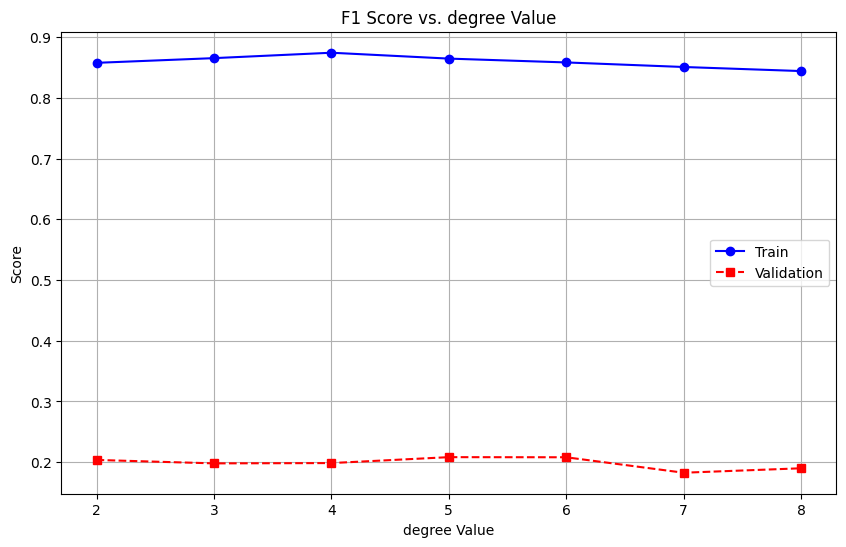

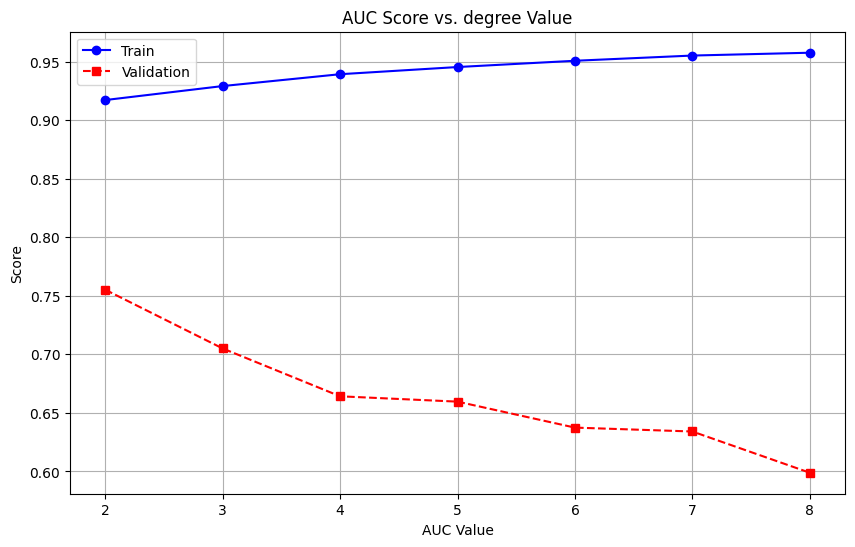

In [ ]:
plot_metrics(f1, degrees, 'F1 Score vs. degree Value','degree Value')
plot_metrics(auc, degrees, 'AUC Score vs. degree Value','AUC Value')

As can be seen in the graphs above degree 2 gave the best F1 and AUC score. Thus, we decided to use a transformation of degree 2 and apply cross validation to get the C value that best models our distribution.

In [ ]:
#@title CV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
f1_scores = {"train": [], "val": []}
auc_scores = {"train": [], "val": []}
accuracy_scores = {"train": [], "val": []}

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Loop over each degree
for c in C_values:
    local_f1 = {"train": [], "val": []}
    local_auc = {"train": [], "val": []}
    local_accuracy = {"train": [], "val": []}

    for train_idx, val_idx in cv.split(X_train, y_train):
        # Split daata
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]

        # Apply scaling
        scaler = StandardScaler()
        numeric_columns = ['age', 'avg_glucose_level', 'bmi']
        X_train_fold.loc[:, numeric_columns] = scaler.fit_transform(X_train_fold[numeric_columns])
        X_val_fold.loc[:, numeric_columns] = scaler.transform(X_val_fold[numeric_columns])
        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        # Train the model
        model = SVC(kernel='poly', degree=2, C=c, gamma='auto', probability=True)
        model.fit(X_train_fold, y_train_fold)

        # Predict and score the model
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)

        local_f1["train"].append(f1_score(y_train_fold, y_train_pred))
        local_f1["val"].append(f1_score(y_val_fold, y_val_pred))

        local_auc["train"].append(roc_auc_score(y_train_fold, model.decision_function(X_train_fold)))
        local_auc["val"].append(roc_auc_score(y_val_fold, model.decision_function(X_val_fold)))

        local_accuracy["train"].append(accuracy_score(y_train_fold, y_train_pred))
        local_accuracy["val"].append(accuracy_score(y_val_fold, y_val_pred))

    # Append average scores
    f1_scores["train"].append(np.mean(local_f1["train"]))
    f1_scores["val"].append(np.mean(local_f1["val"]))
    auc_scores["train"].append(np.mean(local_auc["train"]))
    auc_scores["val"].append(np.mean(local_auc["val"]))
    accuracy_scores["train"].append(np.mean(local_accuracy["train"]))
    accuracy_scores["val"].append(np.mean(local_accuracy["val"]))

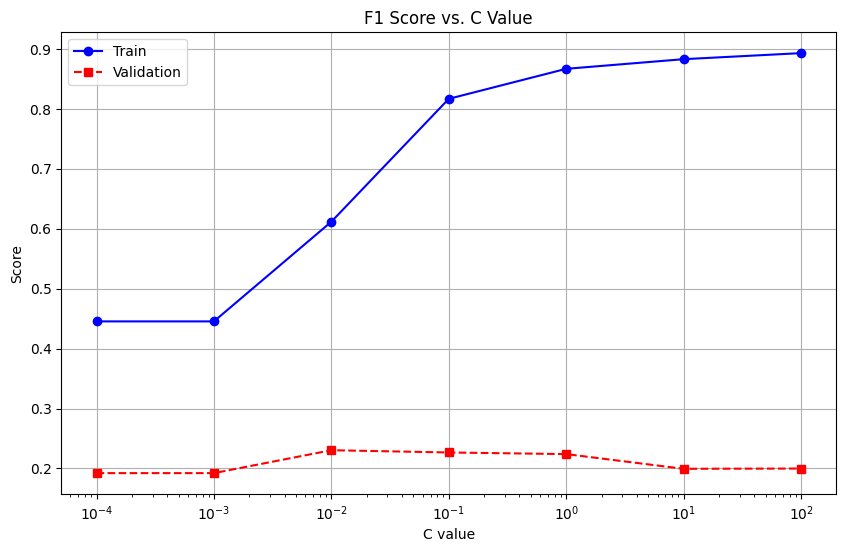

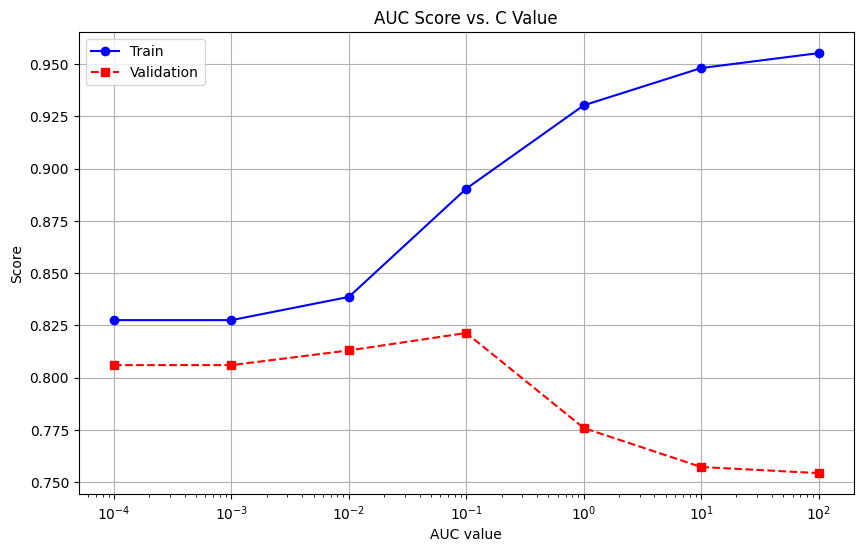

In [ ]:
plot_metrics(f1_scores, C_values, 'F1 Score vs. C Value', 'C value', True)
plot_metrics(auc_scores, C_values, 'AUC Score vs. C Value', 'AUC value', True)

Precision: 0.1288135593220339
Recall: 0.48717948717948717
F1: 0.2037533512064343
AUC: 0.75519787199392


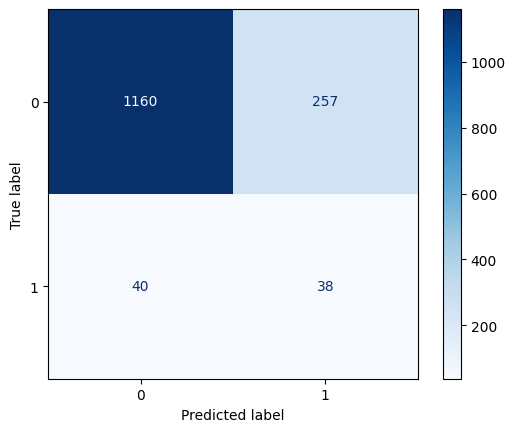

In [ ]:
model = SVC(kernel='poly', C=0.1, random_state=42, degree=2)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = scale_resample(X_train, X_test, y_train, y_test)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_resampled)
model_evaluation(y_test_resampled, y_pred, X_test_resampled, model)

Neural Networks

1. Sigmoid

We will try different parameters for the number of layers (while trying different num of neurons in said layers).

1.1. One hidden layer

We started simple with a single hidden layer and with 20 neurons.

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in teh hidden layer, and got roc_auc and
# accuracy of (80.58284928433129, 77.12) for 30, (81.0506125255596, 75.78) for 25, and
# (81.379946799848, 75.585) for 20

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25), max_iter=2000, activation='logistic', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=25, max_iter=2000,
              random_state=42, solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  81.0506125255596


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100:.4f}')
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 21.9828
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1417
           1       0.13      0.65      0.22        78

    accuracy                           0.76      1495
   macro avg       0.55      0.71      0.54      1495
weighted avg       0.93      0.76      0.82      1495



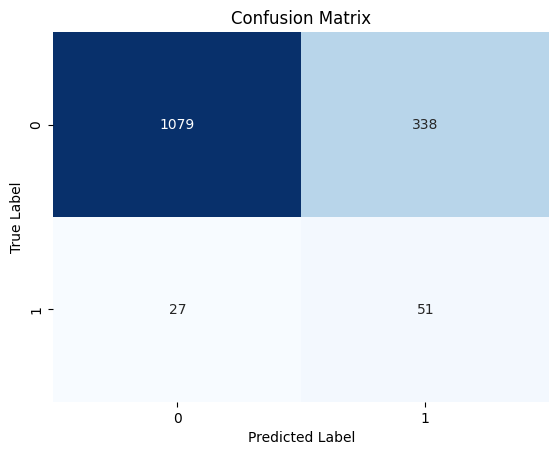

In [ ]:
# confusion matrix for 20 neurons
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

After trianing our model we got an f1 score of 0.22 and an AUC score of 0.81. While our model generalized well we still couldn't solve the low f1 score issue caused by the our data imbalance.

1.2. Two hidden layers

Next we made out model a bit more complex my increasing the number of hidden layers. After experimenting with differnt number of neurons, we were not able to improve the f1 and AUC scores by adding more complexity.

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in th ehidden layer, and got roc_auc and
# accuracy of (80.77013553372058, 75.05016722408027) for (20, 10), (80.45799178473844, 76.187290) for
# (20, 30), and (81.92190072924018, 75.183946) for (20, 18).

# Initialize the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 30), max_iter=1000, activation='logistic', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 30), max_iter=1000,
              random_state=42, solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  80.45799178473844


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100}')
print("Accuracy:", accuracy_score(y_test, predictions)*100)
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 22.270742358078603
Accuracy: 76.18729096989966
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1417
           1       0.13      0.65      0.22        78

    accuracy                           0.76      1495
   macro avg       0.55      0.71      0.54      1495
weighted avg       0.93      0.76      0.83      1495



Our F1 and AUC scores were quite similar to the

1.3. Three hidden layers

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in th ehidden layer, and got (roc_auc,
# accuracy, f1_score) of (74.2006, 94.78, 0) for (20, 18, 10), (75.59397, 76.85, 20.27) for
# (20, 18, 15), and (63.547943, 94.782, 0) for (20, 18, 14).

# Initialize the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 18, 15), max_iter=2000, activation='logistic', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 18, 15),
              max_iter=2000, random_state=42, solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  75.59397788755588


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100:.4f}')
print("Accuracy:", accuracy_score(y_test, predictions)*100)
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 20.2765
Accuracy: 76.8561872909699
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1417
           1       0.12      0.56      0.20        78

    accuracy                           0.77      1495
   macro avg       0.55      0.67      0.53      1495
weighted avg       0.93      0.77      0.83      1495



In [ ]:
from sklearn.metrics import log_loss

cross_entropy = log_loss(y_test, predictions)
print(cross_entropy)

1.880538437693069


best for sigmoid is one layer

2. RELU

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in the hidden layer, and got (roc_auc,
# accuracy, f1_score) of (76.6299, 82.4, 21.9585) for 20, (75.33, 83.54, 19.6078) for
# 30, and (75.47364, 82.94314, 21.05) for 25.

# Initialize the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000, activation='relu', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=2000, random_state=42,
              solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  76.62993322838065


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100:.4f}')
print("Accuracy:", accuracy_score(y_test, predictions)*100)
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 21.9585
Accuracy: 82.40802675585284
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1417
           1       0.14      0.47      0.22        78

    accuracy                           0.82      1495
   macro avg       0.55      0.66      0.56      1495
weighted avg       0.92      0.82      0.87      1495



2.2. Two hidden layers

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in th ehidden layer, and got (roc_auc,
# accuracy, f1_score) of (75.267357, 86.4882, 19.8413) for (20, 10), (76.8769, 84.816,  19.7880) for
# (20, 8), 5 gives less good results for f1 and roc_auc score.

# Initialize the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 8), max_iter=2000, activation='relu', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 5), max_iter=2000, random_state=42,
              solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  74.35535530101515


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100:.4f}')
print("Accuracy:", accuracy_score(y_test, predictions)*100)
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 16.5217
Accuracy: 87.15719063545151
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1417
           1       0.12      0.24      0.17        78

    accuracy                           0.87      1495
   macro avg       0.54      0.57      0.55      1495
weighted avg       0.91      0.87      0.89      1495



3. Tanh

In [ ]:
from sklearn.neural_network import MLPClassifier  # For classification tasks
from sklearn.metrics import roc_auc_score

# We have tried different values for the numbers of neurons in th ehidden layer, and got (roc_auc,
# accuracy, f1_score) of (77.0316, 81.5384, 22.0339) for 10, (74.02421149774, 83.87959,  20.9836) for
# (10, 5), 5 gives less good results for f1 and roc_auc score.

# Initialize the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=2000, activation='tanh', solver='sgd', random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=10, max_iter=2000,
              random_state=42, solver='sgd')

In [ ]:
predictions = mlp.predict_proba(X_test) #we need to predict the probability for each class for AUC
# Evaluation
print("AUC score: ",roc_auc_score(y_test, predictions[:,1])*100)

AUC score:  77.03164866185331


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
predictions = (mlp.predict_proba(X_test)[:, 1] > 0.5).astype(int) #we are using the probability to make a prediction using a threshold of 0.5

# Calculate the F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1*100:.4f}')
print("Accuracy:", accuracy_score(y_test, predictions)*100)
# print("Classification Report:")
print(classification_report(y_test, predictions))

F1 Score: 22.0339
Accuracy: 81.53846153846153
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1417
           1       0.14      0.50      0.22        78

    accuracy                           0.82      1495
   macro avg       0.55      0.67      0.56      1495
weighted avg       0.92      0.82      0.86      1495



In [ ]:
# regularization on all three while taking best combo of layers-num of neurons

In [ ]:
# confusion matrix for the best model